# Global Power Plant:-

Problem Statement:
Description

The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.



Key attributes of the database
The database includes the following indicators:

`country` (text): 3 character country code corresponding to the ISO 3166-1 alpha-3 specification [5]                       
`country_long` (text): longer form of the country designation                                                              
`name` (text): name or title of the power plant, generally in Romanized form                                               
`gppd_idnr` (text): 10 or 12 character identifier for the power plant                                                      
`capacity_mw` (number): electrical generating capacity in megawatts                                                        
`latitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)                                                     
`longitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)                                                    
`primary_fuel` (text): energy source used in primary electricity generation or export                                      
`other_fuel1` (text): energy source used in electricity generation or export                                               
`other_fuel2` (text): energy source used in electricity generation or export                                               
`other_fuel3` (text): energy source used in electricity generation or export                                               
 `commissioning_year` (number): year of plant operation, weighted by unit-capacity when data is available                  
`owner` (text): majority shareholder of the power plant, generally in Romanized form                                       
`source` (text): entity reporting the data; could be an organization, report, or document, generally in Romanized form     
`url` (text): web document corresponding to the `source` field                                                             
`geolocation_source` (text): attribution for geolocation information                                                       
`wepp_id` (text): a reference to a unique plant identifier in the widely-used PLATTS-WEPP database.                        
`year_of_capacity_data` (number): year the capacity information was reported                                               
`generation_gwh_2013` (number): electricity generation in gigawatt-hours reported for the year 2013                        
`generation_gwh_2014` (number): electricity generation in gigawatt-hours reported for the year 2014                        
`generation_gwh_2015` (number): electricity generation in gigawatt-hours reported for the year 2015                        
`generation_gwh_2016` (number): electricity generation in gigawatt-hours reported for the year 2016                        
`generation_gwh_2017` (number): electricity generation in gigawatt-hours reported for the year 2017                         
`generation_gwh_2018` (number): electricity generation in gigawatt-hours reported for the year 2018                         
`generation_gwh_2019` (number): electricity generation in gigawatt-hours reported for the year 2019                        
`generation_data_source` (text): attribution for the reported generation information                                       
`estimated_generation_gwh_2013` (number): estimated electricity generation in gigawatt-hours for the year 2013             
`estimated_generation_gwh_2014` (number): estimated electricity generation in gigawatt-hours for the year 2014             
`estimated_generation_gwh_2015` (number): estimated electricity generation in gigawatt-hours for the year 2015             
`estimated_generation_gwh_2016` (number): estimated electricity generation in gigawatt-hours for the year 2016             
`estimated_generation_gwh_2017` (number): estimated electricity generation in gigawatt-hours for the year 2017             
'estimated_generation_note_2013` (text): label of the model/method used to estimate generation for the year 2013           
`estimated_generation_note_2014` (text): label of the model/method used to estimate generation for the year 2014           
`estimated_generation_note_2015` (text): label of the model/method used to estimate generation for the year 2015           
`estimated_generation_note_2016` (text): label of the model/method used to estimate generation for the year 2016           
`estimated_generation_note_2017` (text): label of the model/method used to estimate generation for the year 2017           
Fuel Type Aggregation                                                                                                       
We define the "Fuel Type" attribute of our database based on common fuel categories.                                       

Prediction :   Make two prediction  1) Primary Fuel    2) capacity_mw                                                       

In [1]:
# importing all required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing data to jupyter using csv file
data=pd.read_csv("database_IND.csv")
df=pd.DataFrame(data)
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,WRI,NaN,2018.0,631.777928,617.789264,843.747000,886.004428,663.774500,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,WRI,NaN,2018.0,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,WRI,NaN,2018.0,NaN,NaN,0.994875,233.596650,865.400000,Central Electricity Authority,NaN
904,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,Industry About,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
906,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


* There are lot of NaN values in the dataset, lets see how can we refine dataset, there are 2 Target variables 
1) capacity_mw:- has float datatype for which we can use regression model.
2) Primary fuel:-it has categorical data so we will be using classification model.

In [3]:
# checking first 10 rows
df.head(10)

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,WRI,NaN,2018.0,631.777928,617.789264,843.7470,886.004428,663.774500,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,WRI,NaN,2018.0,1668.290000,3035.550000,5916.3700,6243.000000,5385.579736,Central Electricity Authority,NaN
5,IND,India,AKRIMOTA LIG,IND0000003,250.0,23.7689,68.6447,Coal,Oil,NaN,...,WRI,NaN,2018.0,821.798000,1153.421000,1208.8520,1175.765000,1147.913000,Central Electricity Authority,NaN
6,IND,India,ALIYAR,IND0000004,60.0,10.4547,77.0078,Hydro,NaN,NaN,...,WRI,NaN,2018.0,147.568450,157.558250,152.1952,61.421350,89.629600,Central Electricity Authority,NaN
7,IND,India,ALLAIN DUHANGAN,IND0000005,192.0,32.2258,77.2070,Hydro,NaN,NaN,...,WRI,NaN,2018.0,696.738800,674.391100,721.3352,675.724400,679.594950,Central Electricity Authority,NaN
8,IND,India,ALMATTI DAM,IND0000006,290.0,16.3300,75.8863,Hydro,NaN,NaN,...,WRI,NaN,2018.0,504.813250,480.594950,144.4342,402.029750,439.372100,Central Electricity Authority,NaN
9,IND,India,AMAR KANTAK,IND0000007,210.0,23.1642,81.6373,Coal,Oil,NaN,...,WRI,NaN,2018.0,2642.322000,1887.904000,1643.0460,1338.093000,1563.457000,Central Electricity Authority,NaN


In [4]:
# checking last 10 rows
df.tail(10)

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
898,IND,India,Wind power project by Riddhi Siddhi Gluco Biol...,WRI1026753,34.65,8.8709,77.4466,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
899,IND,India,Wind power project in Rajasthan,WRI1026769,42.00,27.1715,70.6877,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
900,IND,India,YAMUNANAGAR TPP,IND0000511,600.00,30.1081,77.3257,Coal,Oil,NaN,...,WRI,NaN,2018.0,3158.016,3194.35982,3709.552200,3123.572061,3156.053669,Central Electricity Authority,NaN
901,IND,India,YASHWANTRAO MOHITE,WRI1019995,16.00,17.1653,74.2456,Biomass,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
902,IND,India,YELHANKA (DG),IND0000512,106.60,13.1156,77.5838,Oil,NaN,NaN,...,WRI,NaN,2018.0,20.900,0.00000,0.000000,0.000000,NaN,Central Electricity Authority,NaN
903,IND,India,YERMARUS TPP,IND0000513,1600.00,16.2949,77.3568,Coal,Oil,NaN,...,WRI,NaN,2018.0,NaN,NaN,0.994875,233.596650,865.400000,Central Electricity Authority,NaN
904,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.00,12.8932,78.1654,Solar,NaN,NaN,...,Industry About,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,Yelisirur wind power project,WRI1026776,25.50,15.2758,75.5811,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
906,IND,India,ZAWAR MINES,WRI1019901,80.00,24.3500,73.7477,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
907,IND,India,iEnergy Theni Wind Farm,WRI1026761,16.50,9.9344,77.4768,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Initial Impressions:
* We have to check columns other_fuel2, wepp_id and estimated_generation_gwh as top 10 and last 10 rows show only NaN values. if there is very less data present in these columns we can consider dropping it and refine our data.

# Exploratory Data Analysis (EDA):

In [5]:
# Checking the shape of the dataset
df.shape

(908, 25)

* here we can see that there are 908 rows present in 25 columns

In [6]:
# Lets check for null values and dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   908 non-null    object 
 1   country_long              908 non-null    object 
 2   name                      908 non-null    object 
 3   gppd_idnr                 908 non-null    object 
 4   capacity_mw               908 non-null    float64
 5   latitude                  862 non-null    float64
 6   longitude                 862 non-null    float64
 7   primary_fuel              908 non-null    object 
 8   other_fuel1               199 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        528 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    908 non-null    object 
 14  url       

* so, Here we are confirmed that there are lot of null values present in the dataset
* There are 4 columns which are having all null values, so we can remove it, these columns are Other_fuel3, wepp_id, esitmated_generation_gwh and other_fuel2 which is having only 1 non null value. so, these  columns are of no use for our project we can drop it without any hesitation as there will be alomst nil data lost too.
There is two columns with same type of information, the columns are country and country_long. both are giving exactly same details, so its completely safe to remove one of these two columns. so, i am selecting country_long to be deleted from the dataset.

In [7]:
# re-checking null and NaN values in the dataset
df.isna().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 907
other_fuel3                 908
commissioning_year          380
owner                       566
source                        0
url                           0
geolocation_source           19
wepp_id                     908
year_of_capacity_data       388
generation_gwh_2013         524
generation_gwh_2014         507
generation_gwh_2015         483
generation_gwh_2016         471
generation_gwh_2017         465
generation_data_source      458
estimated_generation_gwh    908
dtype: int64

* Hence confirmed that there are lot of null or NaN values present in the given dataset.
* There are also few columns where there is data available for almost half of the data as compared to actual data present in the dataset i.e. 908. So, we have to balance those columns before selecting our Model.

In [8]:
# lets delete the unrequired 4 columns
df.drop(["country_long","other_fuel2", "other_fuel3","wepp_id","estimated_generation_gwh"], axis=1, inplace=True)

In [9]:
#Checking whether we have successfully deleted the columns or not?
df.head()

,country,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source
0,IND,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,2011.0,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,2004.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,2018.0,631.777928,617.789264,843.747,886.004428,663.774500,Central Electricity Authority
4,IND,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,2015.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,2018.0,1668.290000,3035.550000,5916.370,6243.000000,5385.579736,Central Electricity Authority


* here we can see that we have successfully deleted the columns which were of no use for this project.

In [10]:
#Checking unique values present in columns
df["generation_data_source"].unique()

array([nan, 'Central Electricity Authority'], dtype=object)

In [11]:
df["other_fuel1"].unique()

array([nan, 'Oil', 'Cogeneration', 'Gas'], dtype=object)

* Here we can observe that column generation_data_source is giving same information that is already present with us in source column, moreover source column contains values in all the rows that means there are no null or NaN values present in source column and generation_data_source has 458 rows with null values, so we can drop generation_data_source without any hesitation.
* here we have also observed that there is a column name url, which is very usefull otherwise, but since we are using this data for our analysis purpose only , so we can consider dropping it as it wont do any good for our project.

In [12]:
# checking unique values in all the columns of the dataset
df.nunique()

country                     1
name                      908
gppd_idnr                 908
capacity_mw               365
latitude                  837
longitude                 828
primary_fuel                8
other_fuel1                 3
commissioning_year         73
owner                     280
source                    191
url                       304
geolocation_source          3
year_of_capacity_data       1
generation_gwh_2013       364
generation_gwh_2014       374
generation_gwh_2015       398
generation_gwh_2016       405
generation_gwh_2017       410
generation_data_source      1
dtype: int64

* Here we can observe that Column name and gppd_idnr(it seems like id column) has all the unique values in all rows so, it wont help us in predictions,so we have to drop them.
* columns owner is having details of owner and column country is having IND in all the rows which wont help us in our project analysis, so will drop it too.
* there is column name year_of_capicity_data it has 1 unique value present ant that is 2018, we have data for year upto 2017, so this column is also of no use to us, we can drop it.

In [13]:
# dropping 7 more columns which are not required for our project
df.drop(["country","name","gppd_idnr","owner","url","generation_data_source","year_of_capacity_data"], axis=1, inplace=True)

In [14]:
#checking whether we have successfully dropped the columns or not?
df.tail(10)

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
898,34.65,8.8709,77.4466,Wind,NaN,NaN,CDM,WRI,NaN,NaN,NaN,NaN,NaN
899,42.00,27.1715,70.6877,Wind,NaN,NaN,CDM,WRI,NaN,NaN,NaN,NaN,NaN
900,600.00,30.1081,77.3257,Coal,Oil,2007.0,Central Electricity Authority,WRI,3158.016,3194.35982,3709.552200,3123.572061,3156.053669
901,16.00,17.1653,74.2456,Biomass,NaN,NaN,Yashwantrao Krishna ssk,WRI,NaN,NaN,NaN,NaN,NaN
902,106.60,13.1156,77.5838,Oil,NaN,1993.0,Central Electricity Authority,WRI,20.900,0.00000,0.000000,0.000000,NaN
903,1600.00,16.2949,77.3568,Coal,Oil,2016.0,Central Electricity Authority,WRI,NaN,NaN,0.994875,233.596650,865.400000
904,3.00,12.8932,78.1654,Solar,NaN,NaN,Karnataka Power Corporation Limited,Industry About,NaN,NaN,NaN,NaN,NaN
905,25.50,15.2758,75.5811,Wind,NaN,NaN,CDM,WRI,NaN,NaN,NaN,NaN,NaN
906,80.00,24.3500,73.7477,Coal,NaN,NaN,Hindustan Zinc ltd,WRI,NaN,NaN,NaN,NaN,NaN
907,16.50,9.9344,77.4768,Wind,NaN,NaN,CDM,WRI,NaN,NaN,NaN,NaN,NaN


* Here we can see that we have successfully deleted the columns which were not required for our data analysis.
* I think these remaining columns will help me in building better model for predictions

In [15]:
# Checking datatype for all the columns
df.dtypes

capacity_mw            float64
latitude               float64
longitude              float64
primary_fuel            object
other_fuel1             object
commissioning_year     float64
source                  object
geolocation_source      object
generation_gwh_2013    float64
generation_gwh_2014    float64
generation_gwh_2015    float64
generation_gwh_2016    float64
generation_gwh_2017    float64
dtype: object

* Here we can see that our target variable primary fuel has object datatype and our second target variable capacity_mw is having float datatype.

In [16]:
#Confirming null values once more
df.isnull().sum()

capacity_mw              0
latitude                46
longitude               46
primary_fuel             0
other_fuel1            709
commissioning_year     380
source                   0
geolocation_source      19
generation_gwh_2013    524
generation_gwh_2014    507
generation_gwh_2015    483
generation_gwh_2016    471
generation_gwh_2017    465
dtype: int64

*we can clearly see that there are null values present in all the columns except our target columns capacity_mw and primary_fuel. there is no null values in column source as well.

In [17]:
# lets check the Statistical summary of the dataset provided, studying and observing the data.
df.describe()

,capacity_mw,latitude,longitude,commissioning_year,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
count,908.000000,862.000000,862.000000,528.000000,384.000000,401.000000,425.000000,437.000000,443.000000
mean,321.046378,21.196189,77.447848,1996.876894,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
std,580.221767,6.248627,4.907260,17.047817,3794.767492,4013.558173,4183.203199,4152.038216,4187.236364
min,0.000000,8.168900,68.644700,1927.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.837500,16.771575,74.258975,1988.000000,244.458088,223.650436,174.174750,187.193669,177.643170
50%,60.000000,21.778300,76.719250,2000.000000,797.063475,805.760000,701.027250,716.728350,807.601700
75%,388.125000,25.516375,79.441475,2011.250000,2795.021500,3034.575000,3080.000000,3263.483000,3258.785000
max,4760.000000,34.649000,95.408000,2018.000000,27586.200000,28127.000000,30539.000000,30015.000000,35116.000000


* We can observe that there is difference in mean and median(50% percentile), mean is more in capacity_mw, generation_gwt_2013,generation_gwt_2014,generation_gwt_2015,generation_gwt_2016 and generation_gwt_2017 it means its a Right Skewed Data.
* We can also observe huge difference between 75% percentile and max which denotes presence of outliers in all the columns except latitude, commisioning_year. there are few outliers present in longitude.

# Feature Engineering:

*Lets assign values to all the NaN values present in the dataset

In [18]:
# Using imputation technique to replace NaN values

In [19]:
# Lets check the Skewness 
df.skew()

capacity_mw            3.193257
latitude              -0.143622
longitude              1.100942
commissioning_year    -1.056132
generation_gwh_2013    3.416338
generation_gwh_2014    3.357683
generation_gwh_2015    3.679016
generation_gwh_2016    3.524785
generation_gwh_2017    3.576849
dtype: float64

* Optimum skewness level is between(+/- 0.50) only latitude falls under optimum level, so latitude is not skewed.
* All other columns except latitude has Skewness present.

*********************************************************************
* Now lets replace NaN value with mean in all numerical columns and mode in categorical columns
*********************************************************************

In [20]:
# Replacing NaN Values in numerical columns
df["latitude"]=df["latitude"].fillna(df["latitude"].mean())
df["longitude"]=df["longitude"].fillna(df["longitude"].mean())
df["commissioning_year"]=df["commissioning_year"].fillna(df["commissioning_year"].mean())
df["generation_gwh_2013"]=df["generation_gwh_2013"].fillna(df["generation_gwh_2013"].mean())
df["generation_gwh_2014"]=df["generation_gwh_2014"].fillna(df["generation_gwh_2014"].mean())
df["generation_gwh_2015"]=df["generation_gwh_2015"].fillna(df["generation_gwh_2015"].mean())
df["generation_gwh_2016"]=df["generation_gwh_2016"].fillna(df["generation_gwh_2016"].mean())
df["generation_gwh_2017"]=df["generation_gwh_2017"].fillna(df["generation_gwh_2017"].mean())

In [21]:
# Replacing NaN values in categorical columns
df["other_fuel1"]=df["other_fuel1"].fillna(df["other_fuel1"].mode()[0])
df["geolocation_source"]=df["geolocation_source"].fillna(df["geolocation_source"].mode()[0])

* we have successfully assigned values to the Null or NaN values in the dataset

In [22]:
# Checking all columns for null values
df.isnull().sum()

capacity_mw            0
latitude               0
longitude              0
primary_fuel           0
other_fuel1            0
commissioning_year     0
source                 0
geolocation_source     0
generation_gwh_2013    0
generation_gwh_2014    0
generation_gwh_2015    0
generation_gwh_2016    0
generation_gwh_2017    0
dtype: int64

* we can see that now there are no null or NaN values present in our dataset.

In [23]:
# Lets check unique values in both of our target columns
df["capacity_mw"].unique()

array([2.50000e+00, 9.80000e+01, 3.92000e+01, 1.35000e+02, 1.80000e+03,
       2.50000e+02, 6.00000e+01, 1.92000e+02, 2.90000e+02, 2.10000e+02,
       1.35000e+03, 1.34000e+02, 1.20000e+03, 1.69500e+01, 9.00000e+00,
       2.63000e+03, 4.19330e+02, 6.00000e+02, 1.00000e+01, 1.70000e+01,
       2.40000e+01, 6.52000e+02, 4.60000e+01, 5.00000e+01, 1.00000e+00,
       1.65000e+01, 1.13600e+02, 1.98000e+01, 1.32000e+01, 5.00000e+00,
       2.00000e+02, 7.05000e+02, 2.80000e+01, 4.50000e+02, 1.80000e+02,
       1.05000e+03, 5.10000e+02, 6.75000e+01, 3.00000e+02, 4.55000e+02,
       1.20000e+01, 3.15000e+02, 3.00000e+01, 2.00000e+01, 4.20000e+01,
       7.20000e+02, 9.00000e+01, 1.32000e+03, 1.20000e+02, 6.40000e+01,
       2.70000e+02, 2.28000e+01, 1.50000e+01, 2.52000e+01, 1.80000e+01,
       1.70000e+03, 4.10000e+01, 1.32500e+03, 3.40000e+01, 1.60000e+01,
       5.00000e+02, 8.00000e+01, 7.50000e+01, 1.21000e+03, 9.90000e+01,
       6.96000e+01, 6.00000e+00, 4.00000e+01, 1.65000e+02, 7.500

In [24]:
df["primary_fuel"].unique()

array(['Solar', 'Coal', 'Wind', 'Gas', 'Hydro', 'Biomass', 'Oil',
       'Nuclear'], dtype=object)

In [25]:
# lets divide and assign variables to object/categorical column and float/ integer columns
categorical=[]
integer=[]
for i in df.dtypes.index:
    if df.dtypes[i]=="object":
        categorical.append(i)
    if df.dtypes[i]!="object":
        integer.append(i)
print(categorical)
print(integer)

['primary_fuel', 'other_fuel1', 'source', 'geolocation_source']
['capacity_mw', 'latitude', 'longitude', 'commissioning_year', 'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017']


# Visualization:

#    # Univariate Analysis:

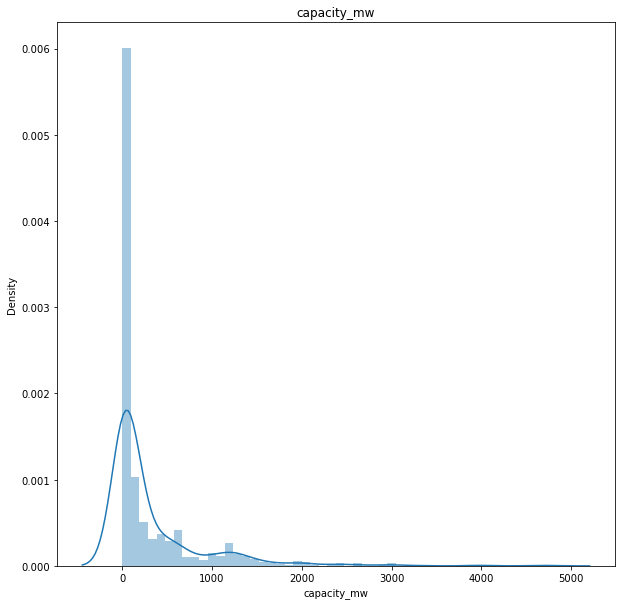

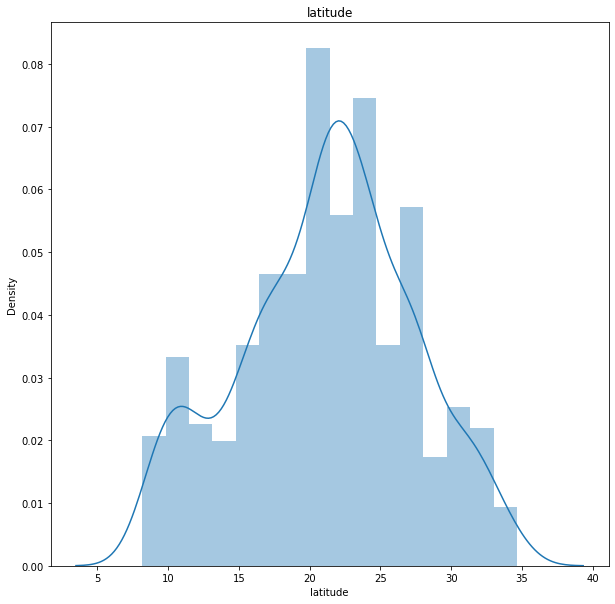

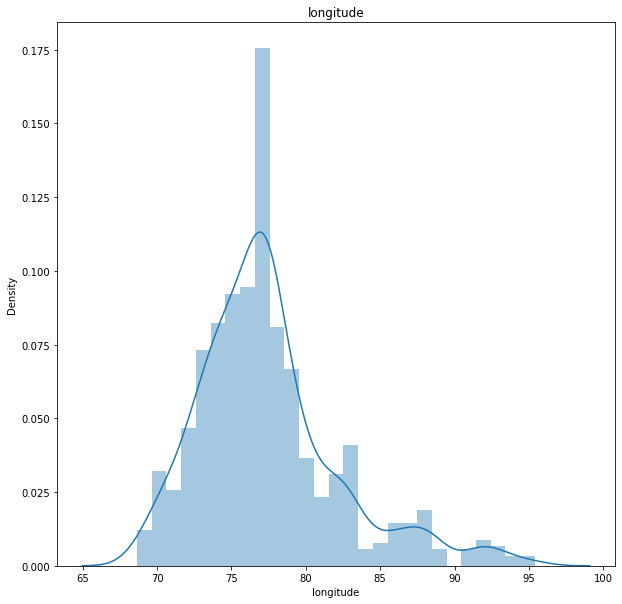

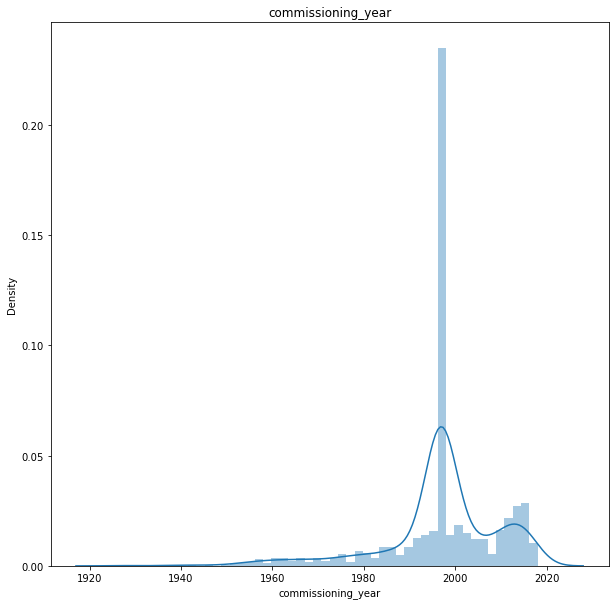

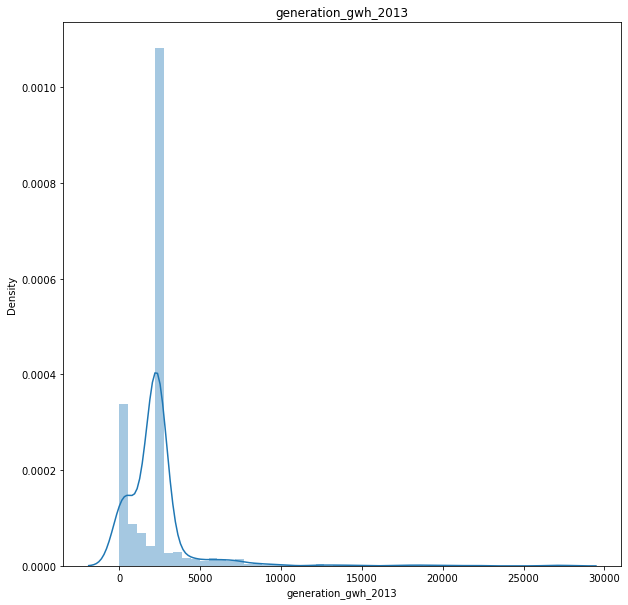

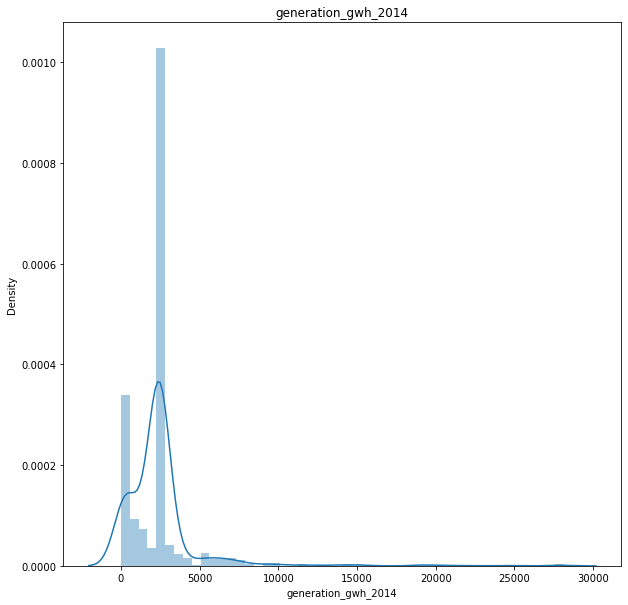

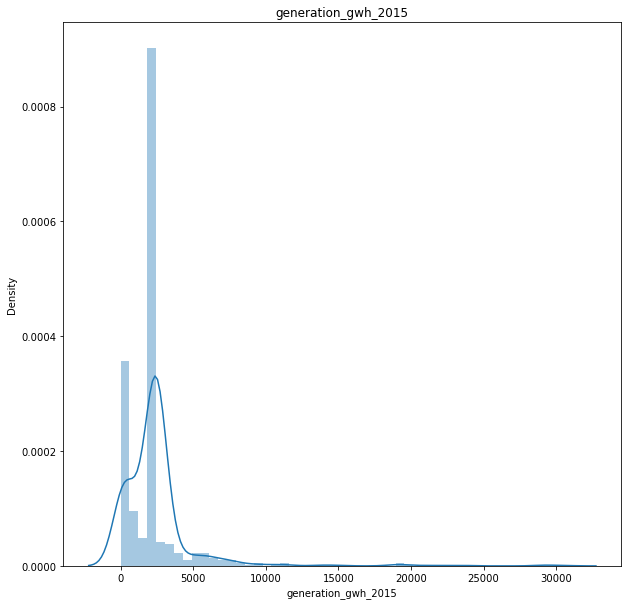

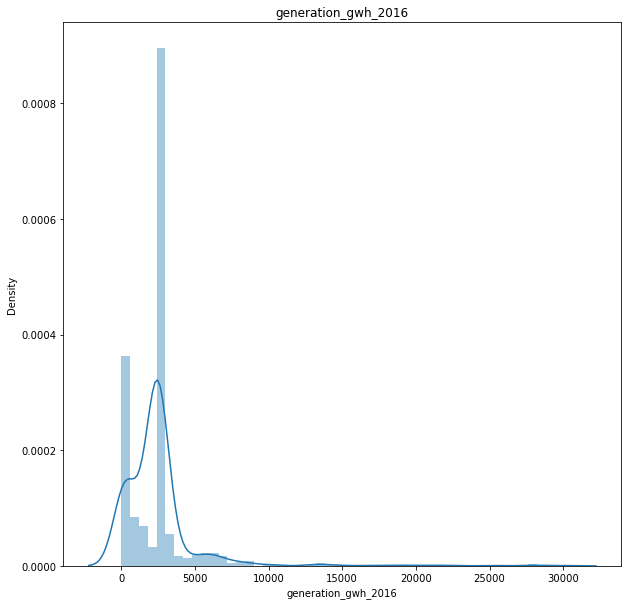

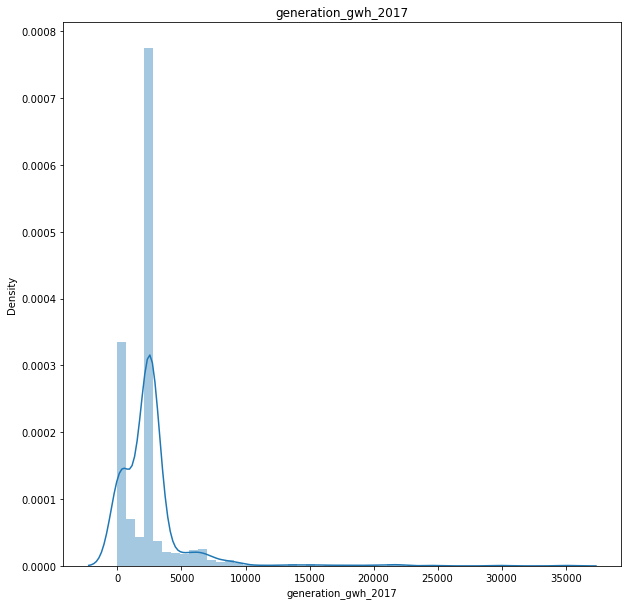

In [26]:
# Lets visualize all the numerical columns using distplot
for i in df[integer]:
    plt.figure(figsize=(10,10))
    sns.distplot(df[i])
    plt.title(i)
    plt.show()

In [27]:
# lets check the types of fuel with value_count in primary_fuel column
df.primary_fuel.value_counts()

Coal       259
Hydro      250
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         21
Nuclear      9
Name: primary_fuel, dtype: int64

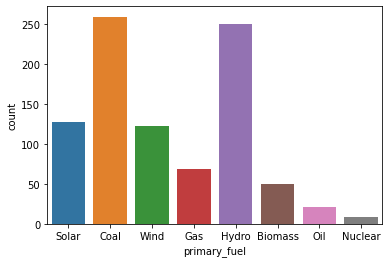

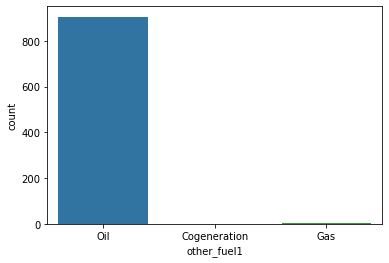

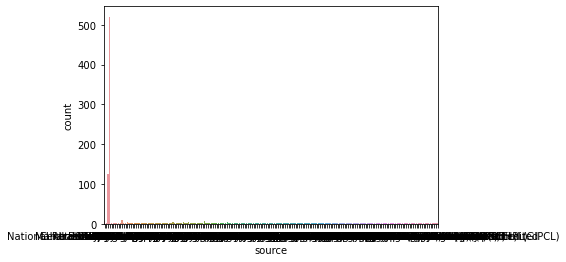

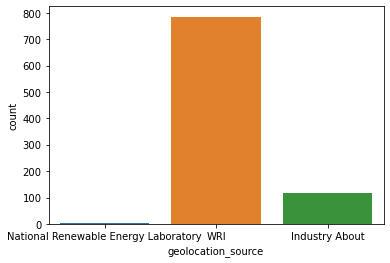

In [28]:
# Lets visualise all categorical columns using count plot
for i in df[categorical]:
    sns.countplot(df[i])
    plt.show()

* Here we can see that we have Mostly Coal and Hydro based power plant, then Solar Based , Wind based, Then gas based, biomass based, oil based and lease Nuclear based Power plants.
* we can see that most of the plants are using oil as there other fuel option
* Geolocation_source of maximum plats is WRI

# Bivariate Analysis:

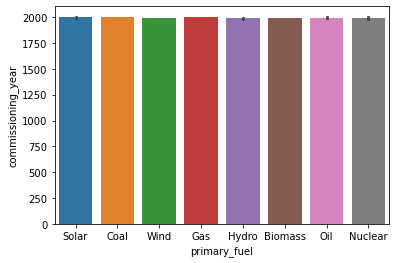

In [29]:
# Lets compare features and try finding out correlation between them
sns.barplot(x="primary_fuel", y="commissioning_year", data=df)
plt.show()

* looking at above bar plot we can't make any observation or prediction.
* lets change column commissioning year to since_years

In [30]:
# lets change commissioning_year to something more informative
df["since_years"]=2018-df["commissioning_year"]
# lets drop the column commissioning_year from the dataset
df.drop(["commissioning_year"], axis=1, inplace=True )
df.head()

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,since_years
0,2.5,28.1839,73.2407,Solar,Oil,National Renewable Energy Laboratory,National Renewable Energy Laboratory,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,7.000000
1,98.0,24.7663,74.6090,Coal,Oil,Ultratech Cement ltd,WRI,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,21.123106
2,39.2,21.9038,69.3732,Wind,Oil,CDM,WRI,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,21.123106
3,135.0,23.8712,91.3602,Gas,Oil,Central Electricity Authority,WRI,631.777928,617.789264,843.747000,886.004428,663.774500,14.000000
4,1800.0,21.9603,82.4091,Coal,Oil,Central Electricity Authority,WRI,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,3.000000


* We have successfully changed the commissioning_year to since_years

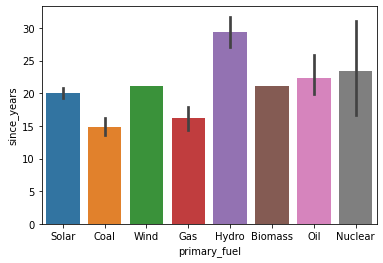

In [31]:
# Lets check the correlation again between primary_fuel and since_years
sns.barplot(x="primary_fuel", y="since_years", data=df)
plt.show()

* Here we can observe that older plants were based mostly on coal and gas, whereas new plants are mostly based on hydro, solar, nuclear, wind and oil.

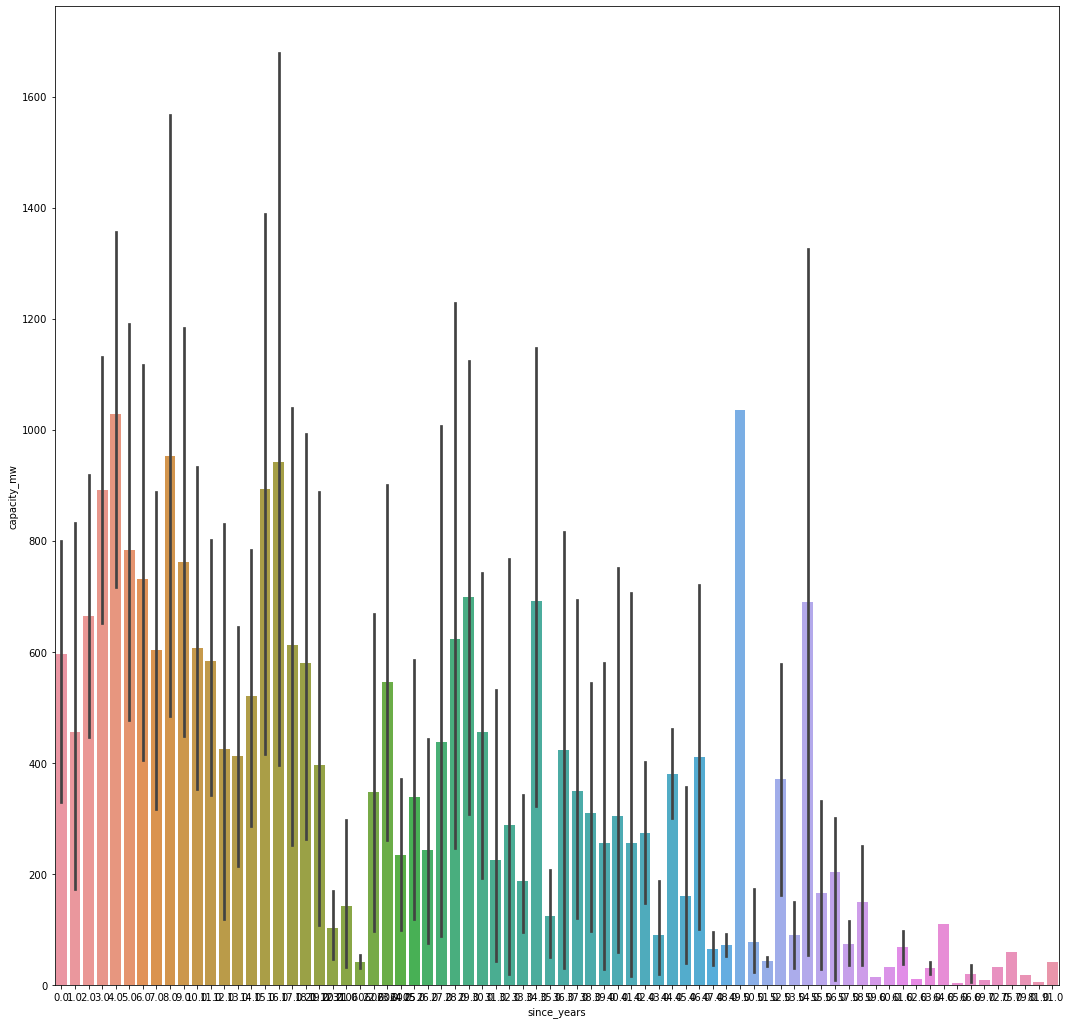

In [32]:
# lets now compare since_years to capacity_mw to see correlation between these 2 columns
plt.figure(figsize=(18,18))
sns.barplot(x="since_years", y="capacity_mw", data=df)
plt.show()

* Here we can clearly see that most of the high capacity power plants are set up in recent years then previous one's.

<AxesSubplot:xlabel='generation_gwh_2013', ylabel='generation_gwh_2014'>

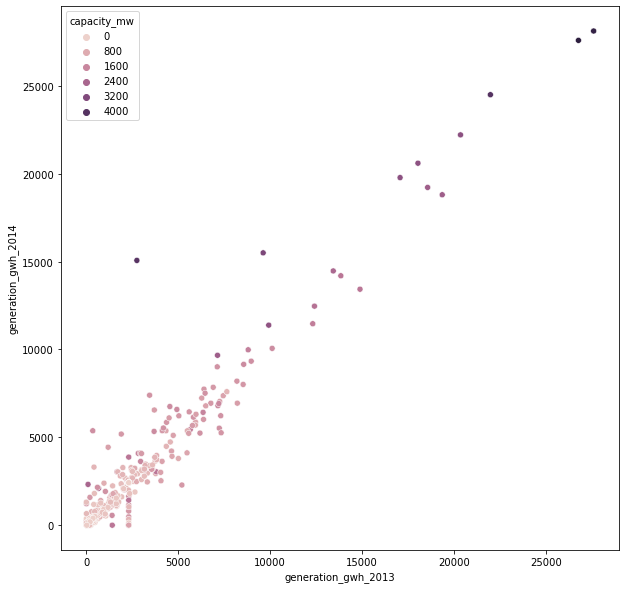

In [33]:
# compairing generation_gwh_2013, generation_gwh_2014
plt.figure(figsize=(10,10))
sns.scatterplot(df["generation_gwh_2013"],df["generation_gwh_2014"],hue=df["capacity_mw"])

* Here we can see that most of the power plants set up are low capicity power plants from 0 to 5000 mw in years 2013 and 2014.

<AxesSubplot:xlabel='generation_gwh_2015', ylabel='generation_gwh_2016'>

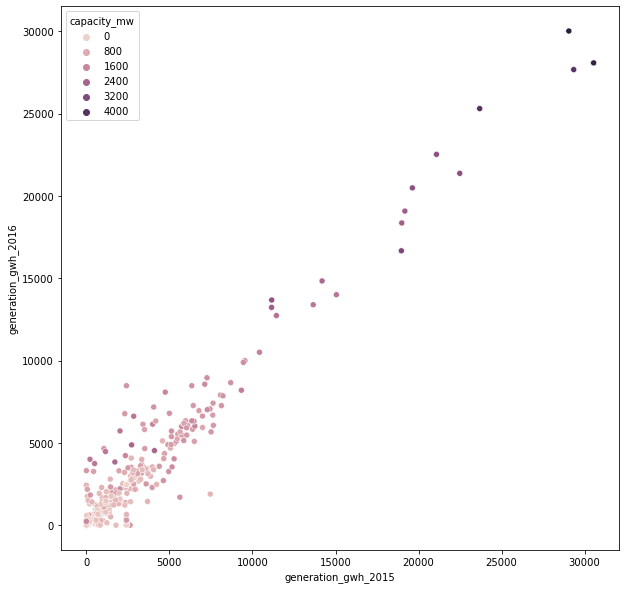

In [34]:
# compairing generation_gwh_2015, generation_gwh_2016
plt.figure(figsize=(10,10))
sns.scatterplot(df["generation_gwh_2015"],df["generation_gwh_2016"],hue=df["capacity_mw"])

* here we can clearly see that more power plants for capacity from 5000 to 10000 mw has been set up during these years, which is good.

<AxesSubplot:xlabel='generation_gwh_2016', ylabel='generation_gwh_2017'>

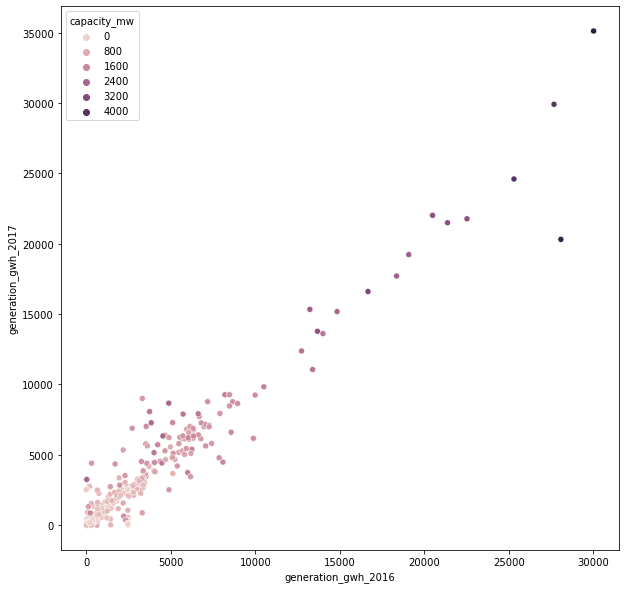

In [35]:
# compairing generation_gwh_2016, generation_gwh_2017
plt.figure(figsize=(10,10))
sns.scatterplot(df["generation_gwh_2016"],df["generation_gwh_2017"],hue=df["capacity_mw"])

* Here we can see substantial increase in no. of small capacity mw project upto 10000 and even bigger projects in the year 2016 and 17.

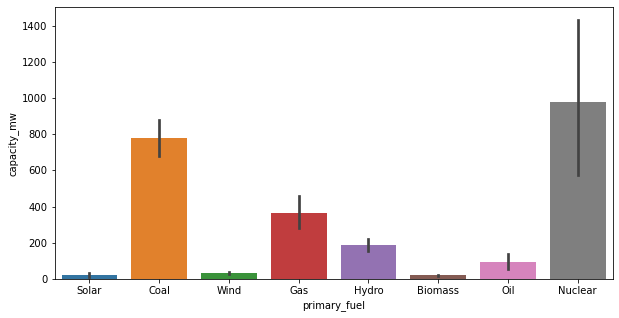

In [36]:
plt.figure(figsize=(10,5))
sns.barplot(x="primary_fuel",y="capacity_mw",data=df)
plt.show()

* We can clearly see plants with more capacity_mw uses Nuclear and Coal. Power plants using solar as a fuel are least for capacity_mw, may be because solar setup takes lot of space, we need to acquire more advanced techonology to set up more capacity_mw powerplants which might also help us in reducing global warming.

# MultiVariate Analysis:

In [37]:
# Checking correlation between all the columns using df.corr()
df.corr()

,capacity_mw,latitude,longitude,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,since_years
capacity_mw,1.000000,0.049790,0.197124,0.667842,0.705434,0.722081,0.752829,0.767040,-0.265827
latitude,0.049790,1.000000,0.031501,0.036639,0.044085,0.036127,0.030932,0.030655,-0.095050
longitude,0.197124,0.031501,1.000000,0.014021,0.011669,0.019176,0.039758,0.040407,-0.086054
generation_gwh_2013,0.667842,0.036639,0.014021,1.000000,0.963454,0.896376,0.873542,0.830639,-0.110848
generation_gwh_2014,0.705434,0.044085,0.011669,0.963454,1.000000,0.953712,0.926010,0.891872,-0.134305
generation_gwh_2015,0.722081,0.036127,0.019176,0.896376,0.953712,1.000000,0.968969,0.928459,-0.149304
generation_gwh_2016,0.752829,0.030932,0.039758,0.873542,0.926010,0.968969,1.000000,0.964786,-0.172698
generation_gwh_2017,0.767040,0.030655,0.040407,0.830639,0.891872,0.928459,0.964786,1.000000,-0.173400
since_years,-0.265827,-0.095050,-0.086054,-0.110848,-0.134305,-0.149304,-0.172698,-0.173400,1.000000


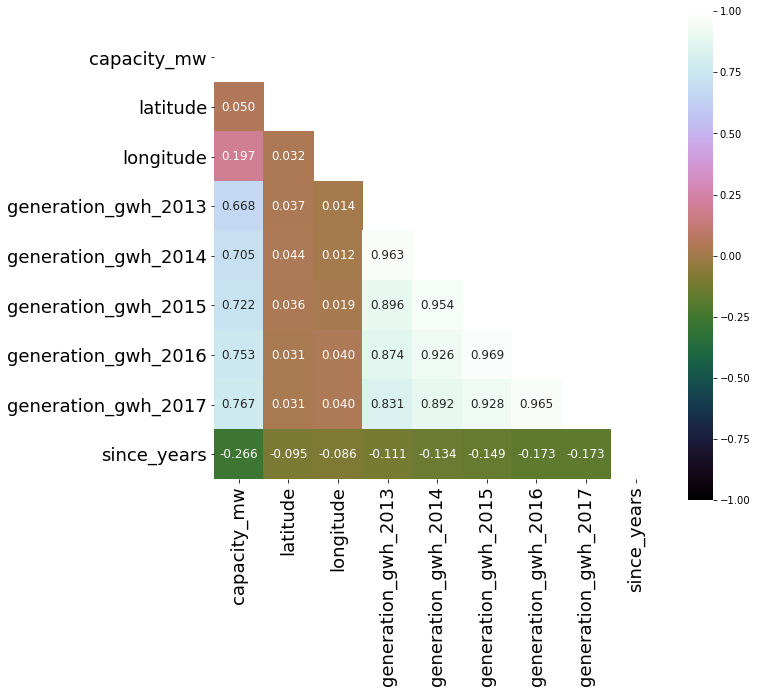

In [38]:
# Lets visualize df.corr( ) using heatmap
upper_triangle=np.triu(df.corr())
plt.figure(figsize=(10,9))
sns.heatmap(df.corr(),vmin=-1,vmax=1, annot=True, square=True, fmt="0.3f", annot_kws={'size':12}, cmap="cubehelix",mask=upper_triangle)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.show()

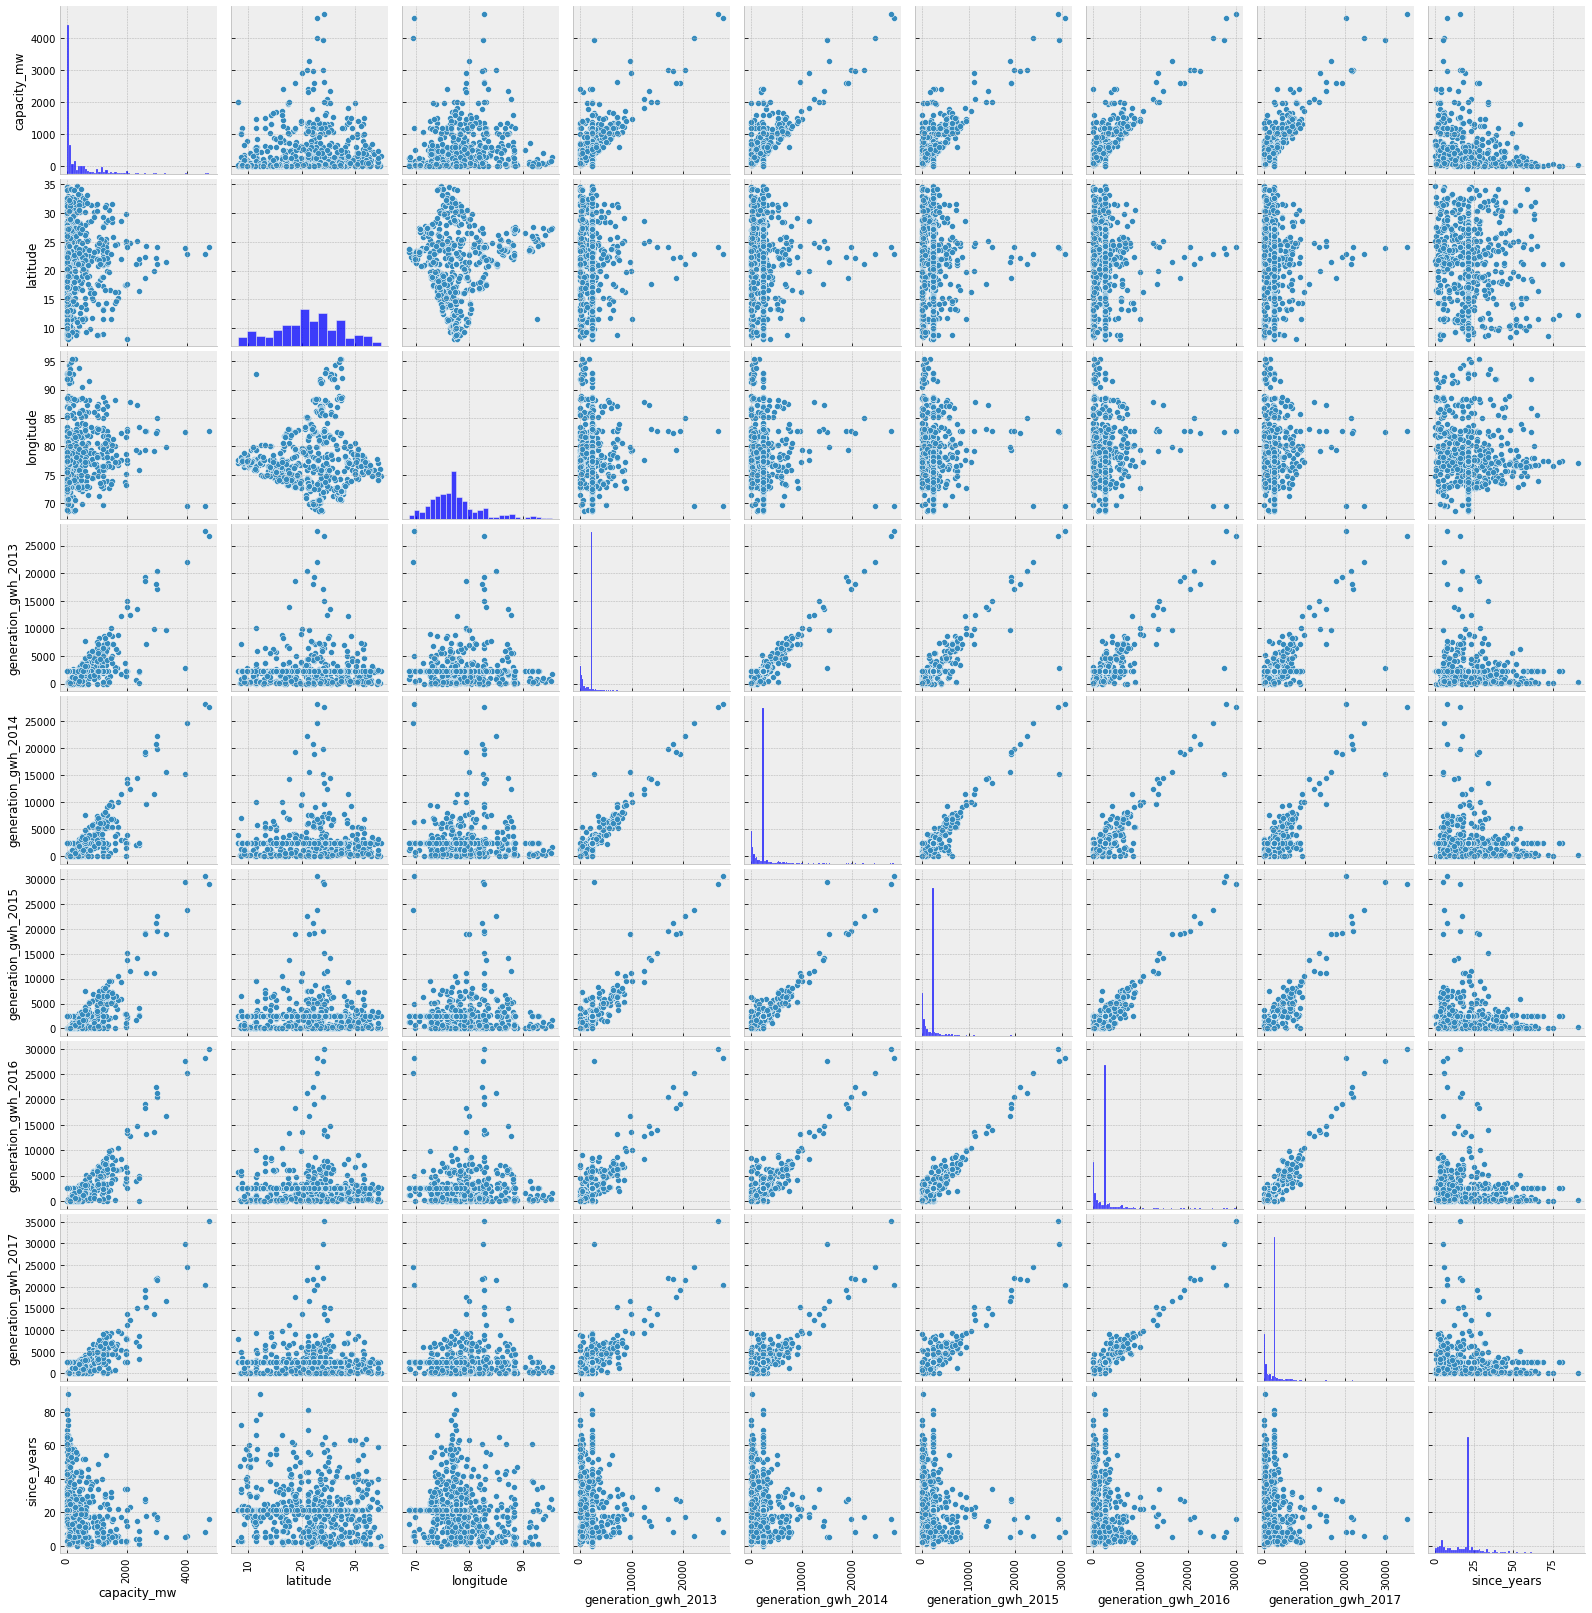

In [39]:
# Checking correlation of capacity_mw with all the columns and observing the spread of data.
plt.style.use('bmh')
g = sns.pairplot(df)
for ax in g.axes.flat:
    ax.tick_params("x", labelrotation=90)
plt.show()

# Encoding:

* Encoding all the object datatype columns 

# Label Encoder:

In [40]:
# importing required libraries
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df["primary_fuel"]=le.fit_transform(df["primary_fuel"])
df["other_fuel1"]=le.fit_transform(df["other_fuel1"])
df.head()

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,since_years
0,2.5,28.1839,73.2407,6,2,National Renewable Energy Laboratory,National Renewable Energy Laboratory,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,7.000000
1,98.0,24.7663,74.6090,1,2,Ultratech Cement ltd,WRI,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,21.123106
2,39.2,21.9038,69.3732,7,2,CDM,WRI,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,21.123106
3,135.0,23.8712,91.3602,2,2,Central Electricity Authority,WRI,631.777928,617.789264,843.747000,886.004428,663.774500,14.000000
4,1800.0,21.9603,82.4091,1,2,Central Electricity Authority,WRI,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,3.000000


* we have successfully converted primary_fuel column

# OrdinalEncoding:

In [41]:
#importing required libraries
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()
df["geolocation_source"]= oe.fit_transform(df["geolocation_source"].values.reshape(-1,1))
df["source"]=oe.fit_transform(df["source"].values.reshape(-1,1))
df.head()

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,since_years
0,2.5,28.1839,73.2407,6,2,109.0,1.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,7.000000
1,98.0,24.7663,74.6090,1,2,174.0,2.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,21.123106
2,39.2,21.9038,69.3732,7,2,21.0,2.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,21.123106
3,135.0,23.8712,91.3602,2,2,22.0,2.0,631.777928,617.789264,843.747000,886.004428,663.774500,14.000000
4,1800.0,21.9603,82.4091,1,2,22.0,2.0,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,3.000000


* We have successfully transformed all object columns and assigned numerical values to them using label and ordinal Encoder

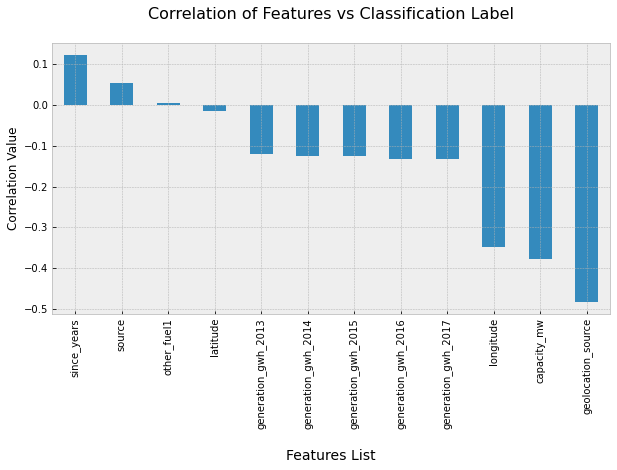

In [42]:
df_corr = df.corr()
plt.figure(figsize=(10,5))
df_corr['primary_fuel'].sort_values(ascending=False).drop('primary_fuel').plot.bar()
plt.title("Correlation of Features vs Classification Label\n", fontsize=16)
plt.xlabel("\nFeatures List", fontsize=14)
plt.ylabel("Correlation Value", fontsize=12)
plt.show()

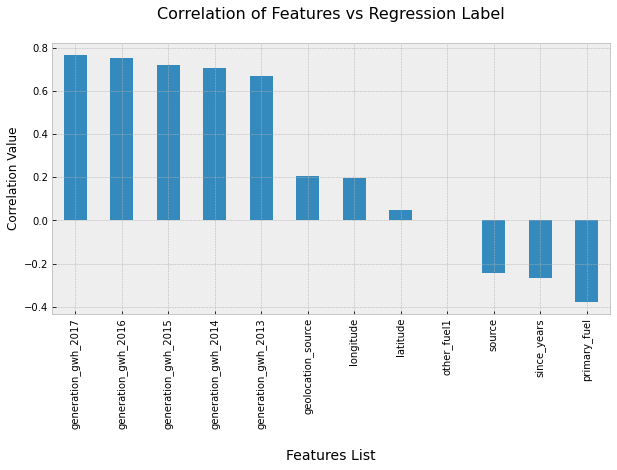

In [43]:
df_corr = df.corr()
plt.figure(figsize=(10,5))
df_corr['capacity_mw'].sort_values(ascending=False).drop('capacity_mw').plot.bar()
plt.title("Correlation of Features vs Regression Label\n", fontsize=16)
plt.xlabel("\nFeatures List", fontsize=14)
plt.ylabel("Correlation Value", fontsize=12)
plt.show()

In [44]:
# lets divide and assign variables to object/categorical column and float/ integer columns
categorical=[]
integer=[]
for i in df.dtypes.index:
    if df.dtypes[i]=="object":
        categorical.append(i)
    if df.dtypes[i]!="object":
        integer.append(i)
print(categorical)
print(integer)

[]
['capacity_mw', 'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'source', 'geolocation_source', 'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'since_years']


# Outliers:

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

<Figure size 1800x1440 with 0 Axes>

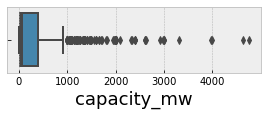

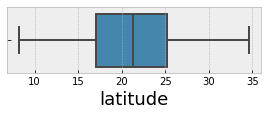

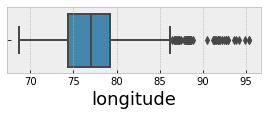

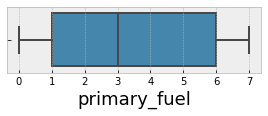

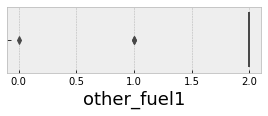

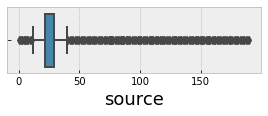

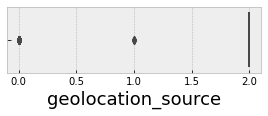

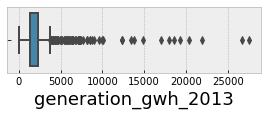

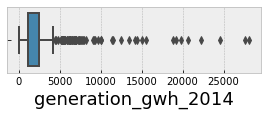

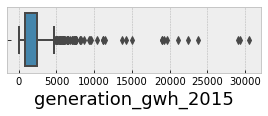

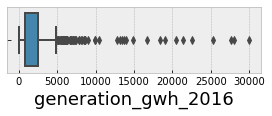

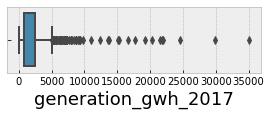

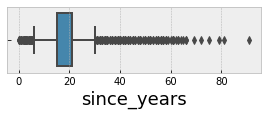

In [45]:
# Checking presence of outlier in the dataset using boxplot
plt.figure(figsize=(25,20))
plot=1
for column in integer:
    if plot<=13:
        plt.figure(figsize=(10,10))
        ax=plt.subplot(7,2,plot)
        sns.boxplot(df[column])
        plt.xlabel(column, fontsize=18)
    plot+=1
plt.tight_layout

* There are lot of outliers present in all the columns except latitude

************************************************************
*lets try two methods of outliers removal IQR and Zscore to check which gives less data loss, will assign different variable so that we dont loose data originally.
* Generally we loose less data using Zscore, but lets try both
************************************************************

# IQR:

In [46]:
# Columns which have outliers
columns=df[["longitude","other_fuel1","source","geolocation_source","generation_gwh_2013","generation_gwh_2014","generation_gwh_2015","generation_gwh_2016","generation_gwh_2017","since_years"]]
# Here we have not included capcity_mw because it is a target column and we should never remove outliers or skewness from the target column.

In [47]:
# Lets remove outliers using IQR method:
a=columns.quantile(0.30)

b=columns.quantile(0.70)

IQR=b-a

df1=df[~((df<(a - 1.5* IQR)) | (df > (b + 1.5 * IQR))).any(axis=1)]

In [48]:
# We have removed outliers successfully now, lets check the shape of the dataset
df1.shape

(33, 13)

* after removing outliers using IQR we got 759 rows and 13 columns.

In [49]:
# lets check the data lost
loss=(((df.shape[0]-df1.shape[0])/df.shape[0])*100)
loss

96.36563876651982

* we are losing 96.37 % of data using IQR.so this is definitely not going to be our method of removing outliers.

# Zscore Method:

In [50]:
# lets see how the performance of Zscore not to remove outliers
# Importing required libraries 
from scipy.stats import zscore
z=np.abs(zscore(columns))
df_1=df[(z<3).all(axis=1)]
df_1

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,since_years
0,2.5,28.1839,73.2407,6,2,109.0,1.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,7.000000
1,98.0,24.7663,74.6090,1,2,174.0,2.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,21.123106
2,39.2,21.9038,69.3732,7,2,21.0,2.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,21.123106
3,135.0,23.8712,91.3602,2,2,22.0,2.0,631.777928,617.789264,843.747000,886.004428,663.774500,14.000000
4,1800.0,21.9603,82.4091,1,2,22.0,2.0,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,3.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,1600.0,16.2949,77.3568,1,2,22.0,2.0,2304.059202,2420.393316,0.994875,233.596650,865.400000,2.000000
904,3.0,12.8932,78.1654,6,2,77.0,0.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,21.123106
905,25.5,15.2758,75.5811,7,2,21.0,2.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,21.123106
906,80.0,24.3500,73.7477,1,2,59.0,2.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,21.123106


In [51]:
# lets check the data lost
loss=(((df.shape[0]-df_1.shape[0])/df.shape[0])*100)
loss

7.929515418502203

* here we can see that there is 7.93% of data loss. which is well under limit

In [52]:
# Now lets check shape of new dataset
df_1.shape

(836, 13)

* in new dataset we have 836 rows in 13 columns

# Skewness:

In [53]:
# lets check for the skewness in new dataframe
df_1.skew()

capacity_mw            2.097473
latitude              -0.112439
longitude              0.847115
primary_fuel           0.422715
other_fuel1            0.000000
source                 1.788418
geolocation_source    -2.108238
generation_gwh_2013    1.545152
generation_gwh_2014    1.457419
generation_gwh_2015    1.333518
generation_gwh_2016    1.342375
generation_gwh_2017    1.274053
since_years            0.847834
dtype: float64

* Here we can see skewness is present in all the columns as limit is (+/-0.50) except latitude, primary_fuel and other_fuel1

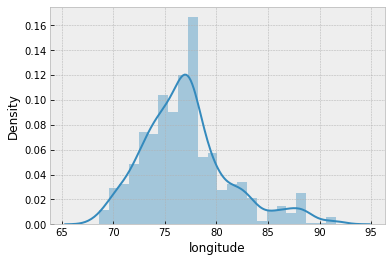

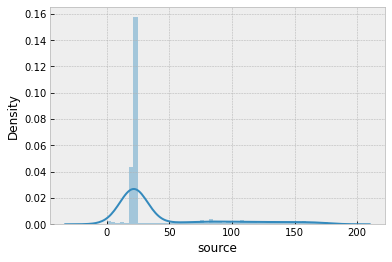

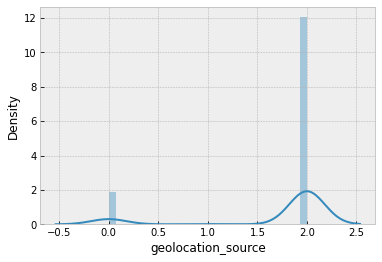

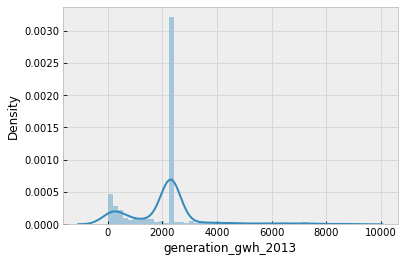

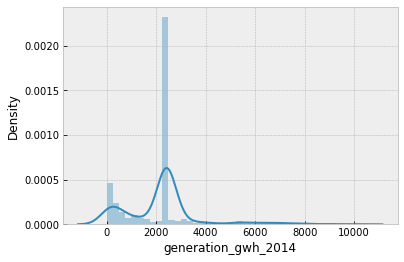

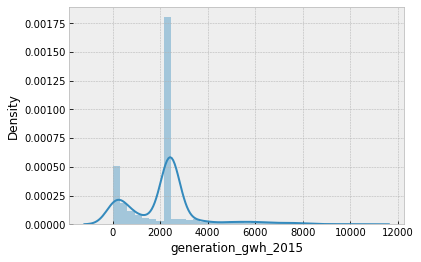

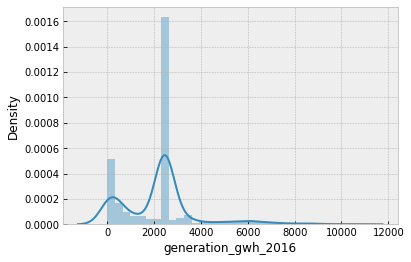

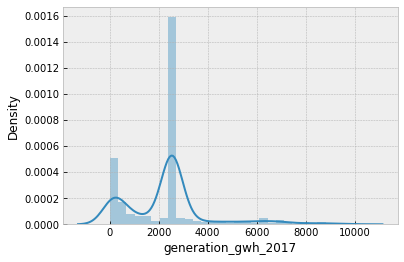

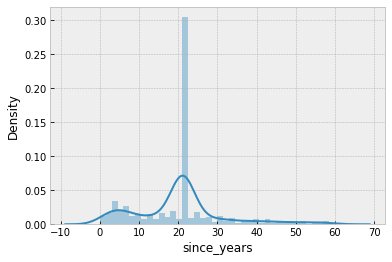

In [54]:
# Lets visualize the skewness present in new dataset
a=["longitude","source","geolocation_source","generation_gwh_2013","generation_gwh_2014","generation_gwh_2015","generation_gwh_2016","generation_gwh_2017","since_years"]
for i in a:
    sns.distplot(df_1[i])
    plt.show()

* here we can see that data is skewed in all the columns lets try to normalize skewness now

In [55]:
# lets remove skewness using yeo-johnson:
a=["capacity_mw","longitude","source","geolocation_source","generation_gwh_2013","generation_gwh_2014","generation_gwh_2015","generation_gwh_2016","generation_gwh_2017","since_years"]

In [56]:
from sklearn.preprocessing import PowerTransformer
scaler=PowerTransformer(method="yeo-johnson")
'''
parameters:
method="box_cox" or "yeo-johnson"
'''


'\nparameters:\nmethod="box_cox" or "yeo-johnson"\n'

In [57]:
df_1[a]=scaler.fit_transform(df_1[a].values)

In [58]:
#Checking whether we have successfully removed skewness or not?
df_1[a].skew()

capacity_mw            0.011160
longitude             -0.000824
source                -0.180693
geolocation_source    -2.080069
generation_gwh_2013   -0.172136
generation_gwh_2014   -0.251129
generation_gwh_2015   -0.316972
generation_gwh_2016   -0.315976
generation_gwh_2017   -0.337137
since_years           -0.000308
dtype: float64

* Here we can clearly see that scores of all the column are in limit now(+/-0.50)

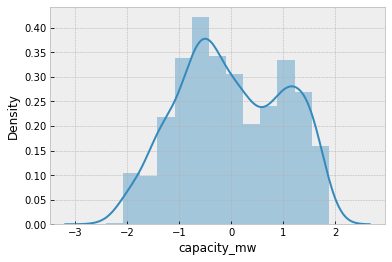

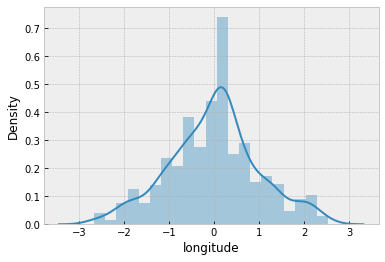

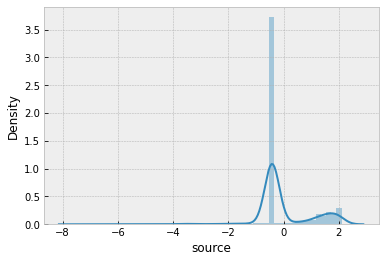

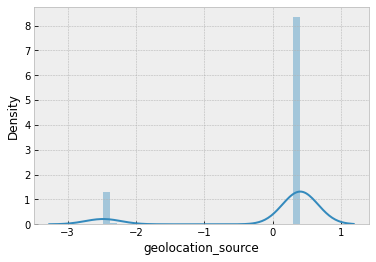

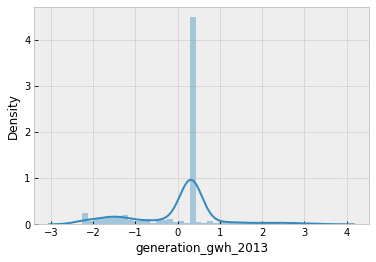

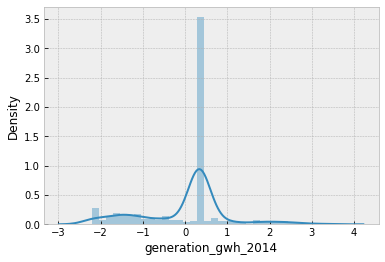

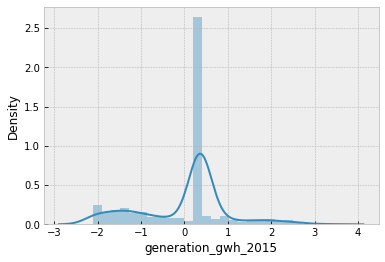

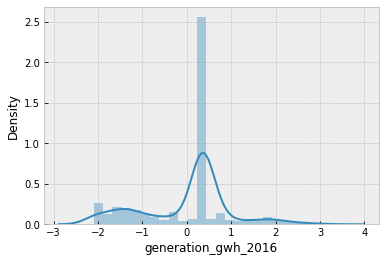

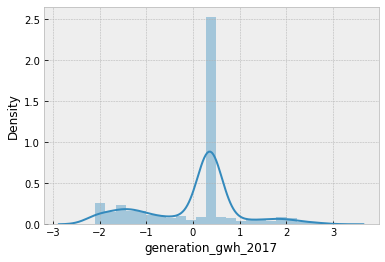

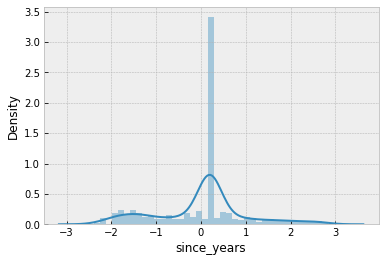

In [59]:
# lets visualize whether we have successfully removed skewness or not?
for i in a:
    sns.distplot(df_1[i])
    plt.show()

* Even in distplot we can see that distribution seems nearly normal.

# Prepairing Models:

We are required to pre pare two models.
Make two prediction  1) Primary Fuel    2) capacity_mw 

# 1) We are prepairing for primary_fuel:so, we will be using classification models.

In [60]:
# lets assign values to x and y
x=df_1.drop("primary_fuel",axis=1)
y=df_1["primary_fuel"]

* i have assigned feature variables to x and target column to y

In [61]:
# Lets use standard scaler for scaling the data
# importing required library
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)

* WE have successfully scaled the data

# balancing the target variable:

In [62]:
# balancing using oversampling method:
y.value_counts()

1    236
3    219
7    123
6    121
2     64
0     45
5     19
4      9
Name: primary_fuel, dtype: int64

In [63]:
# importing library
from imblearn.over_sampling import SMOTE
sm=SMOTE()
x,y=sm.fit_resample(x,y)

In [64]:
# lets check values in variable y
y.value_counts()

0    236
1    236
2    236
3    236
4    236
5    236
6    236
7    236
Name: primary_fuel, dtype: int64

* Here we can see that we have successfully balanced our Target column

# Best Random State:

In [65]:
# lets import all required libraries for best random state
from sklearn.metrics import accuracy_score, r2_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [66]:
max_acc=0
max_rs=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.27, random_state=i)
    m=DecisionTreeClassifier()
    m.fit(x_train,y_train)
    pred=m.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>max_acc:
        max_acc=acc
        max_rs=i
print("Best Accuracy score  ",max_acc,"on random_state ",max_rs)

Best Accuracy score   0.9156862745098039 on random_state  26


* So we have got our best accuracy score on random_state

In [67]:
# lets apply the best random state for splitting data for training and testing
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.27,random_state=40)

In [68]:
# Importing required libraries for Classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score, accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier as knn
from sklearn.naive_bayes import GaussianNB as NB

# 1) K-neighbor Classifier:

In [69]:
k=knn()
k.fit(x_train,y_train)
predkn=k.predict(x_test)
print("Accuracy Score: ", accuracy_score(y_test,predkn))
print("Confusion Matrix: ",confusion_matrix(y_test,predkn))
print(classification_report(y_test,predkn))

Accuracy Score:  0.8549019607843137
Confusion Matrix:  [[57  2  0  0  0  0  0  1]
 [ 6 38  8  1  8  0  0  3]
 [ 0  6 52  0  0  4  0  2]
 [ 0  8  6 36  1  4  0  9]
 [ 0  0  3  0 63  0  0  0]
 [ 1  0  1  0  0 67  0  0]
 [ 0  0  0  0  0  0 62  0]
 [ 0  0  0  0  0  0  0 61]]
              precision    recall  f1-score   support

           0       0.89      0.95      0.92        60
           1       0.70      0.59      0.64        64
           2       0.74      0.81      0.78        64
           3       0.97      0.56      0.71        64
           4       0.88      0.95      0.91        66
           5       0.89      0.97      0.93        69
           6       1.00      1.00      1.00        62
           7       0.80      1.00      0.89        61

    accuracy                           0.85       510
   macro avg       0.86      0.86      0.85       510
weighted avg       0.86      0.85      0.85       510



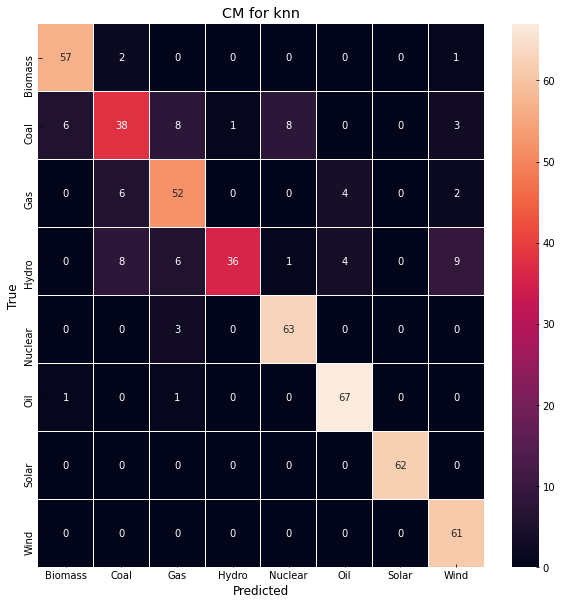

In [70]:
cm= confusion_matrix(y_test, predkn)
x_axis_labels=["Biomass","Coal","Gas","Hydro","Nuclear","Oil","Solar","Wind"]
y_axis_labels=["Biomass","Coal","Gas","Hydro","Nuclear","Oil","Solar","Wind"]

f,ax= plt.subplots(figsize=(10,10))
sns.heatmap(cm, annot = True, linewidths=0.2, fmt = ".0f", ax=ax, xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("CM for knn")
plt.show()

* knn is giving 84.5% accuracy

# 2) Decision Tree Classifier:

In [71]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
pred_dtc=dtc.predict(x_test)
print("Accuracy Score: ",accuracy_score(y_test,pred_dtc))
print("Confusion Matrix: ", confusion_matrix(y_test,pred_dtc))
print(classification_report(y_test,pred_dtc))

Accuracy Score:  0.8823529411764706
Confusion Matrix:  [[56  2  0  0  0  2  0  0]
 [ 2 39 13  4  4  2  0  0]
 [ 0  6 55  0  1  1  0  1]
 [ 0  6  2 55  0  1  0  0]
 [ 0  3  1  1 61  0  0  0]
 [ 0  2  4  1  0 62  0  0]
 [ 0  0  0  0  0  1 61  0]
 [ 0  0  0  0  0  0  0 61]]
              precision    recall  f1-score   support

           0       0.97      0.93      0.95        60
           1       0.67      0.61      0.64        64
           2       0.73      0.86      0.79        64
           3       0.90      0.86      0.88        64
           4       0.92      0.92      0.92        66
           5       0.90      0.90      0.90        69
           6       1.00      0.98      0.99        62
           7       0.98      1.00      0.99        61

    accuracy                           0.88       510
   macro avg       0.88      0.88      0.88       510
weighted avg       0.88      0.88      0.88       510



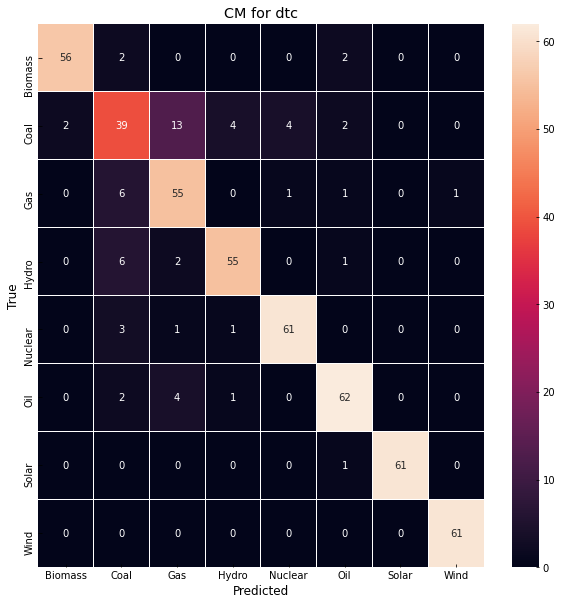

In [72]:
cm= confusion_matrix(y_test, pred_dtc)
x_axis_labels=["Biomass","Coal","Gas","Hydro","Nuclear","Oil","Solar","Wind"]
y_axis_labels=["Biomass","Coal","Gas","Hydro","Nuclear","Oil","Solar","Wind"]

f,ax= plt.subplots(figsize=(10,10))
sns.heatmap(cm, annot = True, linewidths=0.2, fmt = ".0f", ax=ax, xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("CM for dtc")
plt.show()

* Here we are getting accuracy of 87.4% using Decision Tree Classifier

# 3) Support Vector Classifier:

In [73]:
svc=SVC()
svc.fit(x_train,y_train)
pred_svc=svc.predict(x_test)
print("Accuracy Score: ",accuracy_score(y_test,pred_svc))
print("Confusion Matrix: ", confusion_matrix(y_test,pred_svc))
print(classification_report(y_test,pred_svc))

Accuracy Score:  0.8
Confusion Matrix:  [[54  1  0  0  0  1  0  4]
 [ 6 34 10  4  4  1  0  5]
 [ 0  5 41  1  0 15  0  2]
 [ 0 10  8 26  1  4  0 15]
 [ 0  0  0  0 66  0  0  0]
 [ 2  0  0  0  0 64  0  3]
 [ 0  0  0  0  0  0 62  0]
 [ 0  0  0  0  0  0  0 61]]
              precision    recall  f1-score   support

           0       0.87      0.90      0.89        60
           1       0.68      0.53      0.60        64
           2       0.69      0.64      0.67        64
           3       0.84      0.41      0.55        64
           4       0.93      1.00      0.96        66
           5       0.75      0.93      0.83        69
           6       1.00      1.00      1.00        62
           7       0.68      1.00      0.81        61

    accuracy                           0.80       510
   macro avg       0.81      0.80      0.79       510
weighted avg       0.81      0.80      0.79       510



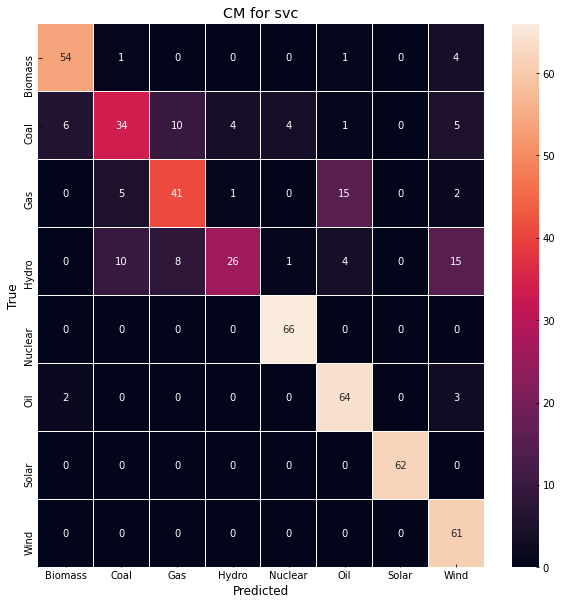

In [74]:
cm= confusion_matrix(y_test, pred_svc)
x_axis_labels=["Biomass","Coal","Gas","Hydro","Nuclear","Oil","Solar","Wind"]
y_axis_labels=["Biomass","Coal","Gas","Hydro","Nuclear","Oil","Solar","Wind"]

f,ax= plt.subplots(figsize=(10,10))
sns.heatmap(cm, annot = True, linewidths=0.2, fmt = ".0f", ax=ax, xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("CM for svc")
plt.show()

* Here we are getting least score so for now of 81%

# 4) Gradient Boosting classifier:

In [75]:
gbc=GradientBoostingClassifier()
gbc.fit(x_train,y_train)
pred_gbc=gbc.predict(x_test)
print("Accuracy Score: ",accuracy_score(y_test,pred_gbc))
print("Confusion Matrix: ", confusion_matrix(y_test,pred_gbc))
print(classification_report(y_test,pred_gbc))

Accuracy Score:  0.9117647058823529
Confusion Matrix:  [[58  1  0  0  0  1  0  0]
 [ 4 48  5  3  4  0  0  0]
 [ 0  3 52  4  1  3  0  1]
 [ 0  8  4 51  0  1  0  0]
 [ 0  0  0  0 66  0  0  0]
 [ 0  1  1  0  0 67  0  0]
 [ 0  0  0  0  0  0 62  0]
 [ 0  0  0  0  0  0  0 61]]
              precision    recall  f1-score   support

           0       0.94      0.97      0.95        60
           1       0.79      0.75      0.77        64
           2       0.84      0.81      0.83        64
           3       0.88      0.80      0.84        64
           4       0.93      1.00      0.96        66
           5       0.93      0.97      0.95        69
           6       1.00      1.00      1.00        62
           7       0.98      1.00      0.99        61

    accuracy                           0.91       510
   macro avg       0.91      0.91      0.91       510
weighted avg       0.91      0.91      0.91       510



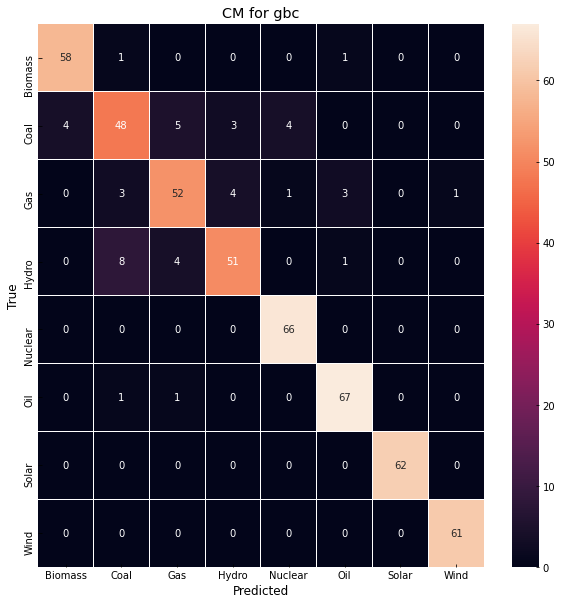

In [76]:
cm= confusion_matrix(y_test, pred_gbc)
x_axis_labels=["Biomass","Coal","Gas","Hydro","Nuclear","Oil","Solar","Wind"]
y_axis_labels=["Biomass","Coal","Gas","Hydro","Nuclear","Oil","Solar","Wind"]

f,ax= plt.subplots(figsize=(10,10))
sns.heatmap(cm, annot = True, linewidths=0.2, fmt = ".0f", ax=ax, xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("CM for gbc")
plt.show()

* We are getting 91.8% accuracy using Gradient Boosting Classifier, which is best so far.

# 5) Random Forest Classifier:

In [77]:
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
pred_rfc=rfc.predict(x_test)
print("Accuracy Score: ",accuracy_score(y_test,pred_rfc))
print("Confusion Matrix: ", confusion_matrix(y_test,pred_rfc))
print(classification_report(y_test,pred_rfc))

Accuracy Score:  0.9137254901960784
Confusion Matrix:  [[58  2  0  0  0  0  0  0]
 [ 3 46  7  4  3  1  0  0]
 [ 0  2 52  4  2  3  0  1]
 [ 0  5  4 52  2  1  0  0]
 [ 0  0  0  0 66  0  0  0]
 [ 0  0  0  0  0 69  0  0]
 [ 0  0  0  0  0  0 62  0]
 [ 0  0  0  0  0  0  0 61]]
              precision    recall  f1-score   support

           0       0.95      0.97      0.96        60
           1       0.84      0.72      0.77        64
           2       0.83      0.81      0.82        64
           3       0.87      0.81      0.84        64
           4       0.90      1.00      0.95        66
           5       0.93      1.00      0.97        69
           6       1.00      1.00      1.00        62
           7       0.98      1.00      0.99        61

    accuracy                           0.91       510
   macro avg       0.91      0.91      0.91       510
weighted avg       0.91      0.91      0.91       510



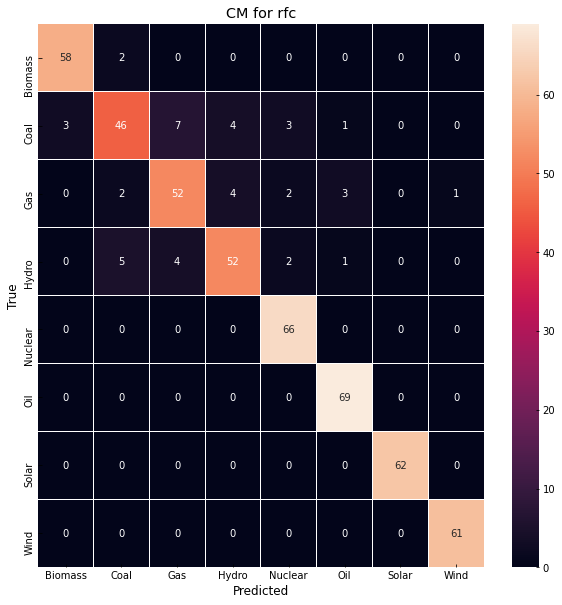

In [78]:
cm= confusion_matrix(y_test, pred_rfc)
x_axis_labels=["Biomass","Coal","Gas","Hydro","Nuclear","Oil","Solar","Wind"]
y_axis_labels=["Biomass","Coal","Gas","Hydro","Nuclear","Oil","Solar","Wind"]

f,ax= plt.subplots(figsize=(10,10))
sns.heatmap(cm, annot = True, linewidths=0.2, fmt = ".0f", ax=ax, xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("CM for rfc")
plt.show()

* Random Forest Classifier is giving best accuracy score 91.6% accuracy
* Here in confusion Matrix we can see the true values and predicted values clearly

# Cross Validation:

In [79]:
# Importing required library
from sklearn.model_selection import cross_val_score

In [80]:
# knn cv score
print(cross_val_score(k,x,y,cv=5).mean())

0.8649207752656028


In [81]:
# DTC cv score
print(cross_val_score(dtc,x,y,cv=5).mean())

0.8951384503108641


In [82]:
# SVC cv score
print(cross_val_score(svc,x,y,cv=5).mean())

0.8400418228004435


In [83]:
# RFC cv score
print(cross_val_score(rfc,x,y,cv=5).mean())

0.9232018300983817


In [84]:
# GBC cv score
print(cross_val_score(gbc,x,y,cv=5).mean())

0.9168442030510995


* After looking both scores model accuracy and cross validation score i found that knn is the best model

# Hyperparameter Tuning:

In [85]:
# lets import required libraries
from sklearn.model_selection import GridSearchCV

In [86]:
 # Here are the parameters for KNN classifier
parameter = {'n_neighbors':[1,2,3,4,5,6],    
             'weights':['uniform','distance'],
             'leaf_size':[10,100,1000],
             'algorithm':['auto','ball_tree','kd_tree','brute']}
gcv=GridSearchCV(knn(),parameter,cv=5)

In [87]:
gcv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [10, 100, 1000],
                         'n_neighbors': [1, 2, 3, 4, 5, 6],
                         'weights': ['uniform', 'distance']})

In [88]:
gcv.best_params_

{'algorithm': 'auto', 'leaf_size': 10, 'n_neighbors': 1, 'weights': 'uniform'}

In [89]:
model1=knn(algorithm='auto',leaf_size=10,n_neighbors=1,weights='uniform')
model1.fit(x_train,y_train)
pred=model1.predict(x_test)
acc=accuracy_score(y_test,pred)

print(acc*100)

90.7843137254902


* After tuning the model with best parameters we got very good score of 90.2% accuracy score.

# ROC-AUC Curve:

In [90]:
# lets plot ROC AUC curve
# importing required libraries
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, auc

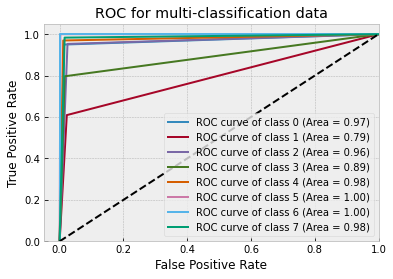

In [91]:
classifier = OneVsRestClassifier(model1)
y_sco = classifier.fit(x_train, y_train).predict_proba(x_test)

y_test_bin  = label_binarize(y_test, classes=[0,1,2,3,4,5,6,7])
n_classes = 8

false_pr = dict()
true_pr = dict()
roc_auc = dict()
for i in range(n_classes):
    false_pr[i], true_pr[i], _ = roc_curve(y_test_bin[:, i], y_sco[:, i])
    roc_auc[i] = auc(false_pr[i], true_pr[i])
   
for i in range(n_classes):
    plt.plot(false_pr[i], true_pr[i], lw=2,
             label='ROC curve of class {0} (Area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for multi-classification data')
plt.legend(loc="lower right")
plt.show()

* Above is the roc curves of all models and my best model is KNN.

# Saving the Model1 :

In [92]:
# saving the model as .pkl file
# import required libraries
import joblib
joblib.dump(model1,"Primary_fuel.pkl")

['Primary_fuel.pkl']

# loading model1:

In [93]:
model1=joblib.load(open("primary_fuel.pkl", 'rb'))
model1.predict(x_test)

array([5, 0, 5, 5, 1, 7, 0, 1, 5, 4, 3, 3, 2, 5, 0, 1, 0, 4, 6, 3, 3, 6,
       7, 0, 6, 6, 2, 7, 6, 2, 6, 5, 6, 6, 6, 7, 5, 3, 3, 7, 7, 5, 1, 7,
       5, 5, 0, 3, 4, 1, 0, 2, 6, 6, 6, 3, 0, 0, 4, 6, 7, 7, 0, 6, 5, 2,
       0, 0, 0, 0, 4, 0, 0, 4, 7, 3, 6, 0, 2, 7, 0, 6, 0, 7, 2, 5, 4, 3,
       4, 7, 0, 1, 5, 4, 5, 1, 3, 2, 4, 5, 5, 4, 4, 3, 2, 6, 7, 2, 0, 6,
       5, 5, 7, 0, 4, 2, 2, 2, 5, 3, 1, 6, 4, 0, 2, 7, 6, 0, 2, 0, 7, 0,
       2, 2, 4, 5, 4, 7, 2, 7, 5, 2, 2, 4, 6, 3, 7, 2, 7, 1, 7, 4, 6, 4,
       3, 6, 4, 7, 1, 3, 6, 7, 7, 5, 2, 0, 0, 1, 7, 5, 4, 4, 7, 5, 2, 2,
       4, 6, 0, 2, 6, 0, 4, 4, 1, 3, 2, 4, 6, 0, 3, 7, 3, 6, 5, 3, 1, 6,
       5, 0, 6, 2, 2, 0, 5, 5, 2, 3, 1, 6, 5, 0, 4, 1, 3, 2, 5, 0, 6, 6,
       7, 6, 6, 5, 1, 0, 0, 7, 4, 4, 1, 1, 6, 3, 3, 5, 0, 1, 5, 3, 5, 6,
       1, 1, 2, 0, 6, 3, 2, 1, 4, 7, 1, 5, 4, 2, 4, 1, 0, 4, 0, 7, 7, 2,
       7, 4, 7, 1, 6, 7, 1, 3, 5, 6, 7, 2, 0, 4, 1, 2, 2, 5, 4, 7, 3, 3,
       2, 3, 2, 5, 0, 0, 1, 3, 2, 5, 2, 1, 1, 5, 2,

In [94]:
pd.DataFrame([model1.predict(x_test)[:],y_test[:]],index=["Predicted","Actual"])

,0,1,2,3,4,5,6,7,8,9,...,500,501,502,503,504,505,506,507,508,509
Predicted,5,0,5,5,1,7,0,1,5,4,...,5,4,4,2,4,4,3,6,5,6
Actual,5,0,5,5,1,7,0,1,5,4,...,5,4,4,2,4,4,3,6,5,6


* Here we can see the predicted value and actual value. most of them are same.

In [95]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["vif_Features"]=[variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif["Features"]=x.columns
vif

,vif_Features,Features
0,1.631998,capacity_mw
1,1.164510,latitude
2,1.213234,longitude
3,NaN,other_fuel1
4,1.293613,source
5,1.521987,geolocation_source
6,11.651304,generation_gwh_2013
7,13.688410,generation_gwh_2014
8,9.983742,generation_gwh_2015
9,13.016042,generation_gwh_2016


In [96]:
df

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,since_years
0,2.5,28.1839,73.2407,6,2,109.0,1.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,7.000000
1,98.0,24.7663,74.6090,1,2,174.0,2.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,21.123106
2,39.2,21.9038,69.3732,7,2,21.0,2.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,21.123106
3,135.0,23.8712,91.3602,2,2,22.0,2.0,631.777928,617.789264,843.747000,886.004428,663.774500,14.000000
4,1800.0,21.9603,82.4091,1,2,22.0,2.0,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,3.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,1600.0,16.2949,77.3568,1,2,22.0,2.0,2304.059202,2420.393316,0.994875,233.596650,865.400000,2.000000
904,3.0,12.8932,78.1654,6,2,77.0,0.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,21.123106
905,25.5,15.2758,75.5811,7,2,21.0,2.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,21.123106
906,80.0,24.3500,73.7477,1,2,59.0,2.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,21.123106


# 2) Model 2: Capacity_mw:

In [97]:
# Lets assign values to x and y
x1=df_1.drop("capacity_mw",axis=1)
y1=df_1["capacity_mw"]

* Here we have successfully assigned values to x1 and y1

In [98]:
x1

,latitude,longitude,primary_fuel,other_fuel1,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,since_years
0,28.1839,-0.937004,6,2,1.617052,-2.286575,0.313028,0.333597,0.359671,0.361897,0.355683,-1.222110
1,24.7663,-0.519651,1,2,2.091265,0.403356,0.313028,0.333597,0.359671,0.361897,0.355683,0.193172
2,21.9038,-2.350681,7,2,-0.467813,0.403356,0.313028,0.333597,0.359671,0.361897,0.355683,0.193172
3,23.8712,2.514162,2,2,-0.399546,0.403356,-1.049671,-1.037102,-0.718743,-0.667541,-0.881876,-0.454492
4,21.9603,1.268982,1,2,-0.399546,0.403356,-0.126805,0.680092,1.903202,1.928026,1.535246,-1.784985
...,...,...,...,...,...,...,...,...,...,...,...,...
903,16.2949,0.213137,1,2,-0.399546,0.403356,0.313028,0.333597,-2.091594,-1.403374,-0.699331,-1.956313
904,12.8932,0.405228,6,2,1.232694,-2.485547,0.313028,0.333597,0.359671,0.361897,0.355683,0.193172
905,15.2758,-0.245311,7,2,-0.467813,0.403356,0.313028,0.333597,0.359671,0.361897,0.355683,0.193172
906,24.3500,-0.777896,1,2,0.918739,0.403356,0.313028,0.333597,0.359671,0.361897,0.355683,0.193172


# Best Random State:

In [99]:
from sklearn.ensemble import RandomForestRegressor
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state =i)
    mod = RandomForestRegressor()
    mod.fit(x_train, y_train)
    pred = mod.predict(x_test)
    acc=r2_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.9586353611848689  on Random_state  85


* here we got the accuracy score of 80.1% on random_state 18

In [100]:
# lets assign best random state values to train and test model
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=.30, random_state=85)

# Regression Method for second model:

In [101]:
# Importing required libraries for algorithms
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import classification_report
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingRegressor
from sklearn import metrics

# 1) KNN:

In [111]:
knn=KNN()
knn.fit(x_train,y_train)
pred=knn.predict(x_test)
print('r2_score:',r2_score(y_test,pred))
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print('root_mean_squared_error:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

r2_score: 0.5629410212710686
mean_squared_error: 0.40341712638755506
mean_absolute_error: 0.45342409927886546
root_mean_squared_error: 0.6351512626040785


* Knn is giving very low score

# 2) RandomForestRegressor:

In [112]:
RF=RandomForestRegressor()
RF.fit(x_train,y_train)
pred=RF.predict(x_test)
print('r2_score:',r2_score(y_test,pred))
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print('root_mean_squared_error:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

r2_score: 0.7938904657803412
mean_squared_error: 0.19024461242687693
mean_absolute_error: 0.3144520686958695
root_mean_squared_error: 0.43617039379911715


* RFR is giving 76% accuracy

# 3) Gradient Boosting:

In [113]:
g=GradientBoostingRegressor()
g.fit(x_train,y_train)
pred=g.predict(x_test)
print('r2_score:',r2_score(y_test,pred))
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print('root_mean_squared_error:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

r2_score: 0.8048410439738503
mean_squared_error: 0.1801369358841018
mean_absolute_error: 0.3210584248994635
root_mean_squared_error: 0.4244254185179085


* Gradient is giving us 61.2% accuracy

# 4) Decision Tree Regressor:

In [114]:
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
pred=dtr.predict(x_test)

In [115]:
print('r2_score:',r2_score(y_test,pred))
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print('root_mean_squared_error:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

r2_score: 0.7165774157681415
mean_squared_error: 0.26160662530414336
mean_absolute_error: 0.3781877911202795
root_mean_squared_error: 0.5114749508080951


* Here Decision tree is giving accuracy of 47.25%.

# Cross Validation Score:

In [116]:
print(cross_val_score(knn,x1,y1,cv=5).mean())

0.6288516204723408


In [117]:
print(cross_val_score(RF,x1,y1,cv=5).mean())

0.7857752427929767


In [118]:
print(cross_val_score(g,x1,y1,cv=5).mean())

0.7977511062343342


In [119]:
print(cross_val_score(dtr,x1,y1,cv=5).mean())

0.6730813681825476


* score drop is least in random forest regression, so we will take random forest regression as our best model and will tune that model now.

# Hyperparameter tuning:

In [120]:
# importing required libraries
from sklearn.model_selection import GridSearchCV

In [121]:
# Parameter selection for Random forest
parameter = {'criterion': ['mse','mae'],
            'n_estimators':[100,200,300,400],
            'max_depth': [5,6,7,8],
            'max_features':['auto','sqrt','log2'],
            'bootstrap': [True, False]}

In [122]:
gcv=GridSearchCV(RandomForestRegressor(),parameter,cv=5)
gcv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['mse', 'mae'], 'max_depth': [5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [100, 200, 300, 400]})

In [123]:
gcv.best_params_

{'bootstrap': False,
 'criterion': 'mae',
 'max_depth': 8,
 'max_features': 'log2',
 'n_estimators': 200}

In [124]:
model2=RandomForestRegressor(bootstrap=False,criterion='mae',max_depth=8,max_features='log2',n_estimators=200)
model2.fit(x_train,y_train)
pred=model2.predict(x_test)
print('r2_Score:',r2_score(y_test,pred)*100)
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print("RMSE value:",np.sqrt(metrics.mean_squared_error(y_test, pred)))

r2_Score: 81.70645319935248
mean_squared_error: 0.16885432952815696
mean_absolute_error: 0.29660556289178996
RMSE value: 0.41091888436546326


* After tuning the model we got score of 81.7% accuracy which is good.

# Saving model2:

In [125]:
# Saving model using .pkl
joblib.dump(model2,"Capacity_mw.pkl")

['Capacity_mw.pkl']

# Loading model2:

In [126]:
model2=joblib.load(open("Capacity_mw.pkl", 'rb'))
model2.predict(x_test)

array([-2.20559582e-01, -6.14408731e-01, -5.73446711e-01, -1.49419942e+00,
       -3.72000062e-01,  3.78321607e-02, -6.38286140e-01,  1.54343840e+00,
        8.70574812e-01, -1.45559696e+00, -1.80657288e-01, -2.84015832e-01,
       -2.68445824e-01, -4.61166428e-01, -9.52269232e-04, -1.96147059e-01,
       -1.05723809e+00, -8.99831246e-01, -7.34216181e-01,  3.94357724e-01,
        1.16058282e+00, -7.35308679e-01,  1.02899524e+00,  1.20958979e-01,
       -7.95687567e-01, -5.66202444e-01,  9.97875319e-01,  2.93797559e-01,
       -7.61426903e-01, -1.05987755e+00, -1.50919484e-01,  8.01913241e-01,
       -8.63820761e-01,  2.22427359e-01, -5.72935215e-01,  7.36910892e-01,
       -4.96472961e-01,  1.05698308e+00, -4.69820776e-01,  1.52751421e-01,
        1.61359652e+00, -3.23724156e-01,  1.01912400e+00, -9.76517220e-01,
        9.05123072e-01, -1.21289960e+00, -4.42688388e-01, -1.19234742e+00,
       -4.40407234e-01, -5.92091532e-01, -5.66202444e-01, -7.40853073e-01,
       -1.49404693e+00, -

In [127]:
pd.DataFrame([model2.predict(x_test)[:],y_test[:]],index=["Predicted","Actual"])

,0,1,2,3,4,5,6,7,8,9,...,241,242,243,244,245,246,247,248,249,250
Predicted,-0.220560,-0.614409,-0.573447,-1.494199,-0.372000,0.037832,-0.638286,1.543438,0.870575,-1.455597,...,-0.517151,1.120373,0.440413,-0.566215,-0.902153,0.760637,-0.903503,0.011608,-0.823012,-1.443614
Actual,-0.469096,-0.411679,-0.159058,-0.654336,-0.013955,-0.339998,-0.591652,1.570523,1.015171,0.209344,...,-0.725128,1.160372,-0.065235,-1.004533,-1.071069,0.739499,-0.772447,0.307108,-0.470992,-1.361306
